In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 203 data

### Reading the files and extracting relevant information:

In [3]:
plant = "AY"
xls_files = {}

xls = pd.ExcelFile(
    f"../../../data/raw/204/EMBRAPII hubIC IACC CIMENTO_{plant}.xlsx",
    engine="openpyxl",
)
xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  AY ['INSTRUÇÕES', '12']


<IPython.core.display.Javascript object>

In [5]:
cement_types_per_plant = []
CEMENT_TYPE_COLS = ["Tipo de cimento", "Classe de resistência"]
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[1:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[1, 2])

        if not df[CEMENT_TYPE_COLS].iloc[2:].isna().all().all():
            cement_type = (
                df[CEMENT_TYPE_COLS]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .str.replace("nan", "")
                .unique()
            )

        else:
            cement_type = (
                df[[("Obs.", "Unnamed: 8_level_1")]]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .unique()
            )

        cement_types_per_plant.append((plant, sheet_name, cement_type))
        dataframes.append(df)

<IPython.core.display.Javascript object>

In [6]:
cement_types_per_plant

[('AY', '12', array(['', 'CPIII40RS'], dtype=object))]

<IPython.core.display.Javascript object>

In [7]:
cements = []
for tup in cement_types_per_plant:
    cements.append(tup[2][0])
Counter(cements)

Counter({'': 1})

<IPython.core.display.Javascript object>

In [8]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[1:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"] = plant
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [9]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [10]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   (Cidade, Unnamed: 1_level_2)                 975 non-null    object        
 1   (Data, Produção)                             975 non-null    datetime64[ns]
 2   (Horário, Produção)                          0 non-null      float64       
 3   (Data, Medida)                               0 non-null      float64       
 4   (Horário, Medida)                            0 non-null      float64       
 5   (Tipo de cimento, Unnamed: 6_level_2)        975 non-null    object        
 6   (Classe de resistência, Unnamed: 7_level_2)  0 non-null      float64       
 7   (Obs., Unnamed: 8_level_2)                   0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 61.1+ KB


<IPython.core.display.Javascript object>

In [11]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      float64

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  0 non-null      float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 53.5 KB


<IPython.core.display.Javascript object>

In [13]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                10 non-null     float64
 1   MgO                10 non-null     float64
 2   Na2O               0 non-null      float64
 3   Al2O3              0 non-null      float64
 4   SiO2               10 non-null     float64
 5   SO3                975 non-null    float64
 6   K2O                0 non-null      float64
 7   TiO2               0 non-null      float64
 8   Fe2O3              8 non-null      float64
 9   Perda ao fogo      975 non-null    float64
 10  Resíduo insolúvel  468 non-null    float64
 11  Obs.               0 non-null      float64
dtypes: float64(12)
memory usage: 91.6 KB


<IPython.core.display.Javascript object>

In [14]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          0 non-null      float64
 1   C2S total          0 non-null      float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               0 non-null      float64
 6   C3A                0 non-null      float64
 7   C3A cubic          0 non-null      float64
 8   C3A orto           0 non-null      float64
 9   CaO livre          0 non-null      float64
 10  Portlandita        0 non-null      float64
 11  Periclasio         0 non-null      float64
 12  Arcanita           0 non-null      float64
 13  Aphthalita         0 non-null      float64
 14  Langbeinita        0 non-null      float64
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          0 non-n

<IPython.core.display.Javascript object>

In [15]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [16]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            975 non-null    float64
 1   (Unnamed: 137_level_1, #200)              975 non-null    float64
 2   (Unnamed: 138_level_1, #325)              975 non-null    float64
 3   (Unnamed: 139_level_1, #400)              0 non-null      float64
 4   (Unnamed: 140_level_1, Massa específica)  0 non-null      float64
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(6)
memory usage: 45.9 KB


<IPython.core.display.Javascript object>

In [17]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           975 non-null    float64
 1   (Tempo de pega, Fim)              975 non-null    float64
 2   (Resistência à compressão, 1 d)   0 non-null      float64
 3   (Resistência à compressão, 3 d)   975 non-null    float64
 4   (Resistência à compressão, 7 d)   975 non-null    float64
 5   (Resistência à compressão, 28 d)  975 non-null    float64
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(7)
memory usage: 53.5 KB


<IPython.core.display.Javascript object>

In [18]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [19]:
df = pd.concat(
    [
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"],
        df["Dados iniciais"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 34 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1, Unnamed: 0_level_2)  976 non-null    object 
 1   (Cidade, Unnamed: 1_level_2)                                  975 non-null    object 
 2   (Data, Produção)                                              975 non-null    object 
 3   (Horário, Produção)                                           0 non-null      object 
 4   (Data, Medida)                                                0 non-null      object 
 5   (Horário, Medida)                                             0 non-null      object 
 6   (Tipo de cimento, Unnamed: 6_level_2)                         975 non-null    object 
 7   (Classe de resistência, Unnamed: 7_level_2)                   0 non-nul

<IPython.core.display.Javascript object>

In [21]:
COLUMNS_TO_DROP = [
    ("Data", "Medida"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    # ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"): "Plant",
    ("Cidade", "Unnamed: 1_level_2"): "City",
    ("Data", "Produção"): "Date",  # Arrumar!
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Final setting time",
    ("Tempo de pega", "Fim"): "Initial setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

# # Preprocessing
df["Cement_Type"] = df["Cement_Type"].replace("Fibro", "Fibrocimento")


df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [22]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [23]:
NUMERIC_COLUMNS = [
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "#400",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

<IPython.core.display.Javascript object>

In [24]:
df = df[df["Plant"] == "AY"].reset_index(drop=True)

<IPython.core.display.Javascript object>

# EDA

In [25]:
df.shape

(975, 26)

<IPython.core.display.Javascript object>

In [26]:
df.head()

,Plant,City,Date,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,...,#325,#400,Specific Gravity,Final setting time,Initial setting time,CS1,CS3,CS7,CS28,Cement_Type
0,AY,Santana do Paraíso - MG,2020-01-02,NaN,NaN,NaN,NaN,NaN,1.93,NaN,...,1.09,NaN,NaN,180.0,240.0,NaN,19.0,32.1,45.6,CPIII 40 RS
1,AY,Santana do Paraíso - MG,2020-01-02,NaN,NaN,NaN,NaN,NaN,2.06,NaN,...,1.07,NaN,NaN,150.0,210.0,NaN,22.5,36.7,50.9,CPIII 40 RS
2,AY,Santana do Paraíso - MG,2020-01-04,51.18,3.96,NaN,NaN,28.50,2.21,NaN,...,1.15,NaN,NaN,170.0,230.0,NaN,17.7,31.8,45.7,CPIII 40 RS
3,AY,Santana do Paraíso - MG,2020-01-04,53.98,3.99,NaN,NaN,26.96,1.91,NaN,...,1.10,NaN,NaN,150.0,210.0,NaN,22.2,35.2,48.0,CPIII 40 RS
4,AY,Santana do Paraíso - MG,2020-01-07,NaN,NaN,NaN,NaN,NaN,2.35,NaN,...,1.08,NaN,NaN,200.0,260.0,NaN,18.6,33.8,49.3,CPIII 40 RS


<IPython.core.display.Javascript object>

In [27]:
df.tail()

,Plant,City,Date,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,...,#325,#400,Specific Gravity,Final setting time,Initial setting time,CS1,CS3,CS7,CS28,Cement_Type
970,AY,Santana do Paraíso - MG,2023-06-24,NaN,NaN,NaN,NaN,NaN,1.54,NaN,...,1.62,NaN,NaN,170.0,210.0,NaN,21.1,33.8,46.2,CPIII 40 RS
971,AY,Santana do Paraíso - MG,2023-06-27,NaN,NaN,NaN,NaN,NaN,1.68,NaN,...,1.95,NaN,NaN,175.0,240.0,NaN,16.3,28.7,42.9,CPIII 40 RS
972,AY,Santana do Paraíso - MG,2023-06-27,NaN,NaN,NaN,NaN,NaN,1.61,NaN,...,1.53,NaN,NaN,165.0,210.0,NaN,19.6,32.8,45.5,CPIII 40 RS
973,AY,Santana do Paraíso - MG,2023-06-29,NaN,NaN,NaN,NaN,NaN,1.70,NaN,...,2.01,NaN,NaN,195.0,240.0,NaN,17.1,29.8,43.3,CPIII 40 RS
974,AY,Santana do Paraíso - MG,2023-06-29,NaN,NaN,NaN,NaN,NaN,1.68,NaN,...,1.59,NaN,NaN,170.0,220.0,NaN,20.8,33.9,46.4,CPIII 40 RS


<IPython.core.display.Javascript object>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plant                 975 non-null    object        
 1   City                  975 non-null    object        
 2   Date                  975 non-null    datetime64[ns]
 3   CaO                   10 non-null     float64       
 4   MgO                   10 non-null     float64       
 5   Na2O                  0 non-null      float64       
 6   Al2O3                 0 non-null      float64       
 7   SiO2                  10 non-null     float64       
 8   SO3                   975 non-null    float64       
 9   K2O                   0 non-null      float64       
 10  TiO2                  0 non-null      float64       
 11  Fe2O3                 8 non-null      float64       
 12  Loss on Ignition      975 non-null    float64       
 13  Insoluble Residue   

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [29]:
df.dtypes.value_counts()

float64           22
object             3
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [30]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,975,2021-09-23 01:03:30.461538304,2020-01-02 00:00:00,2020-10-30 00:00:00,2021-09-14 00:00:00,2022-08-16 00:00:00,2023-06-29 00:00:00,NaN
CaO,10.0,51.233,50.01,50.7275,50.945,51.1375,53.98,1.112096
MgO,10.0,3.832,3.08,3.8375,3.88,3.9825,4.03,0.276759
Na2O,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al2O3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SiO2,10.0,29.127,26.96,28.9175,29.355,29.725,29.97,0.901801
SO3,975.0,2.020031,0.91,1.8,2.1,2.26,3.2,0.322082
K2O,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TiO2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe2O3,8.0,3.08375,2.3,3.105,3.175,3.2225,3.33,0.327062


<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [31]:
df.describe(exclude="number").T

,count,unique,top,freq,mean,min,25%,50%,75%,max
Plant,975,1,AY,975,NaN,NaN,NaN,NaN,NaN,NaN
City,975,1,Santana do Paraíso - MG,975,NaN,NaN,NaN,NaN,NaN,NaN
Date,975,NaN,NaN,NaN,2021-09-23 01:03:30.461538304,2020-01-02 00:00:00,2020-10-30 00:00:00,2021-09-14 00:00:00,2022-08-16 00:00:00,2023-06-29 00:00:00
Cement_Type,975,1,CPIII 40 RS,975,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [32]:
df["Plant"].unique()

array(['AY'], dtype=object)

<IPython.core.display.Javascript object>

In [33]:
df["Cement_Type"].unique()

array(['CPIII 40 RS'], dtype=object)

<IPython.core.display.Javascript object>

In [34]:
df["City"].unique()

array(['Santana do Paraíso - MG'], dtype=object)

<IPython.core.display.Javascript object>

In [35]:
df["Plant"].value_counts()

Plant
AY    975
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df["Cement_Type"].value_counts()

Cement_Type
CPIII 40 RS    975
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [37]:
df["City"].value_counts()

City
Santana do Paraíso - MG    975
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_419992/3223151730.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


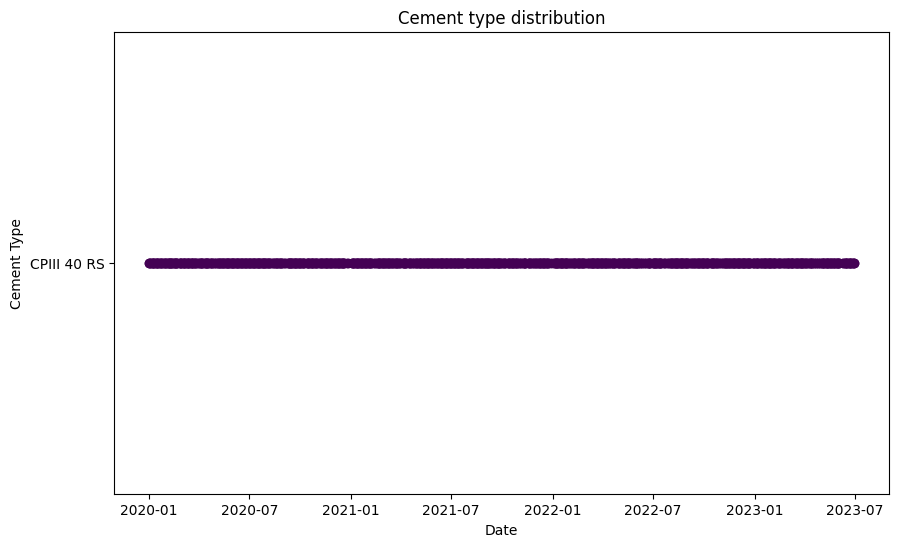

<IPython.core.display.Javascript object>

In [38]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(10, 6))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [39]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

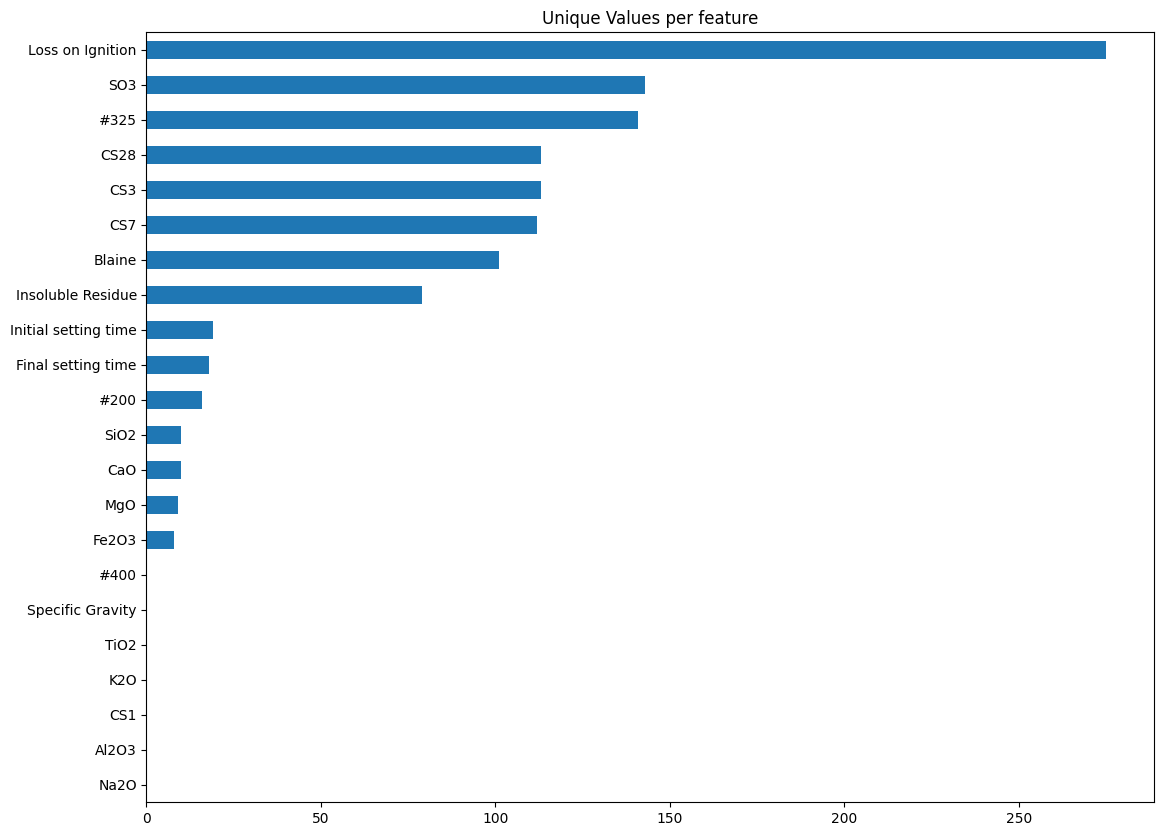

<IPython.core.display.Javascript object>

In [40]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Plant'),
  Text(1, 0, 'City'),
  Text(2, 0, 'Cement_Type'),
  Text(3, 0, 'Date')])

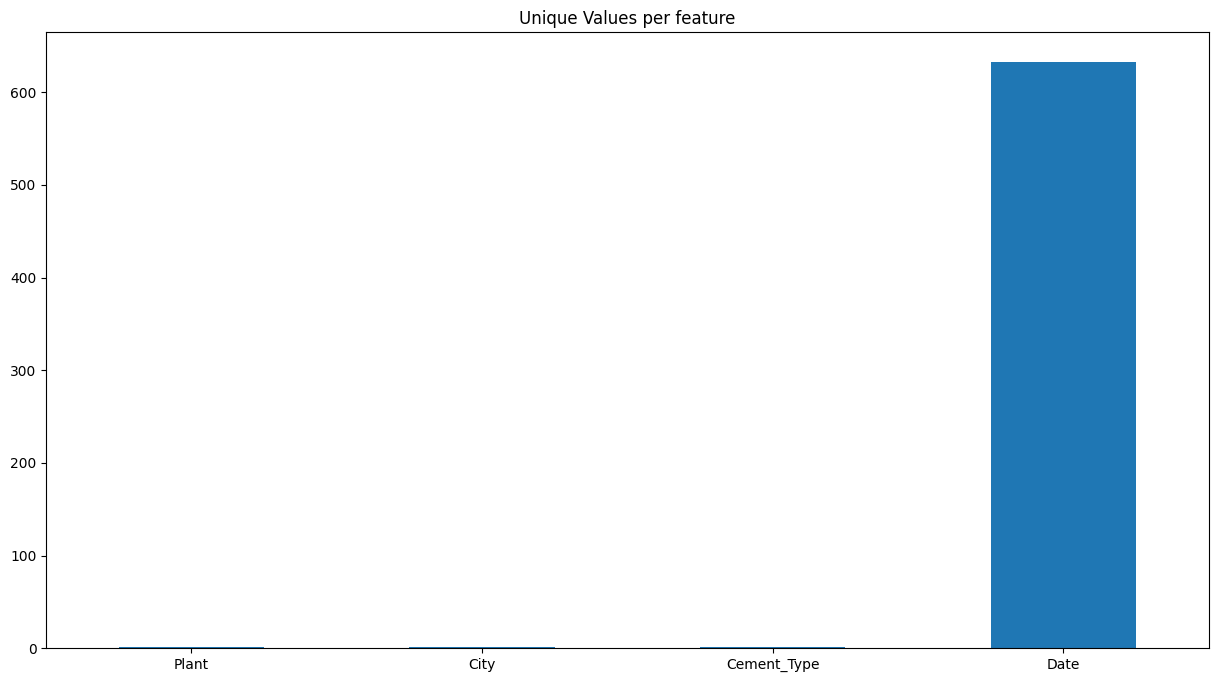

<IPython.core.display.Javascript object>

In [41]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'City'), Text(2, 0, 'Cement_Type')])

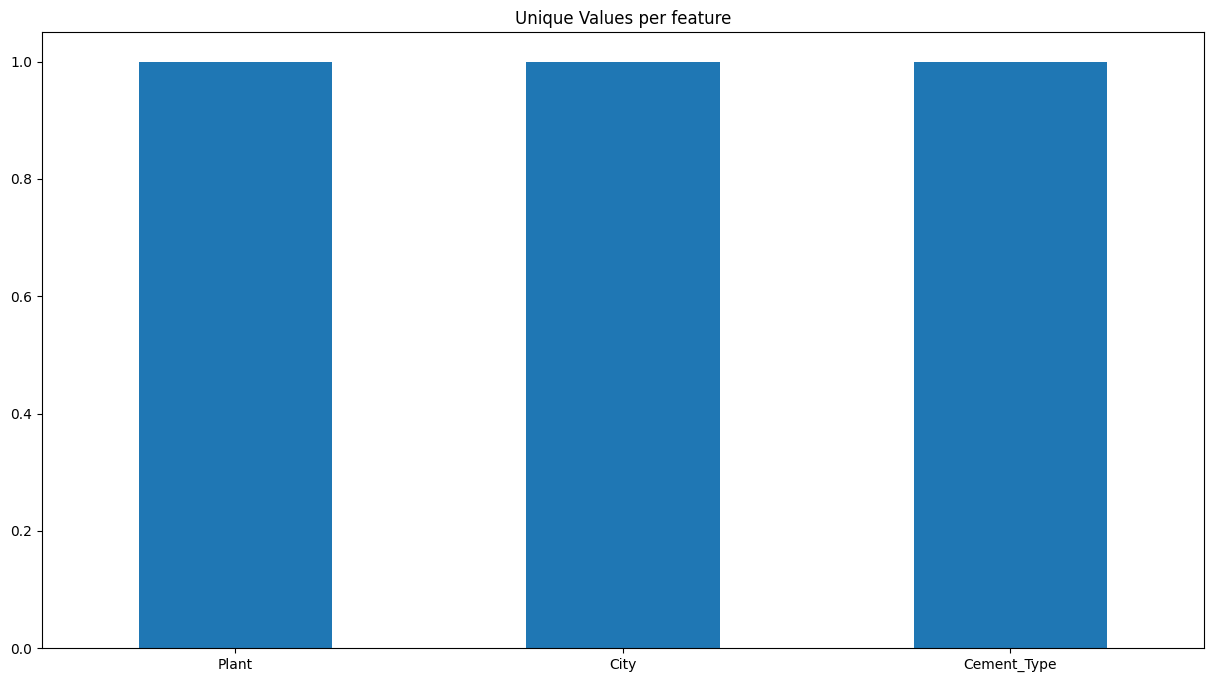

<IPython.core.display.Javascript object>

In [42]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [43]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 12 variables with missing values from a total of 26


<IPython.core.display.Javascript object>

In [44]:
df.isna().any()

Plant                   False
City                    False
Date                    False
CaO                      True
MgO                      True
Na2O                     True
Al2O3                    True
SiO2                     True
SO3                     False
K2O                      True
TiO2                     True
Fe2O3                    True
Loss on Ignition        False
Insoluble Residue        True
Blaine                  False
#200                    False
#325                    False
#400                     True
Specific Gravity         True
Final setting time      False
Initial setting time    False
CS1                      True
CS3                     False
CS7                     False
CS28                    False
Cement_Type             False
dtype: bool

<IPython.core.display.Javascript object>

In [45]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

,Missing (count)
Specific Gravity,975
CS1,975
Na2O,975
Al2O3,975
#400,975
K2O,975
TiO2,975
Fe2O3,967
CaO,965
MgO,965


<IPython.core.display.Javascript object>

In [46]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
Specific Gravity,100.000000
CS1,100.000000
Na2O,100.000000
Al2O3,100.000000
#400,100.000000
K2O,100.000000
TiO2,100.000000
Fe2O3,99.179487
CaO,98.974359
MgO,98.974359


<IPython.core.display.Javascript object>

<BarContainer object of 26 artists>

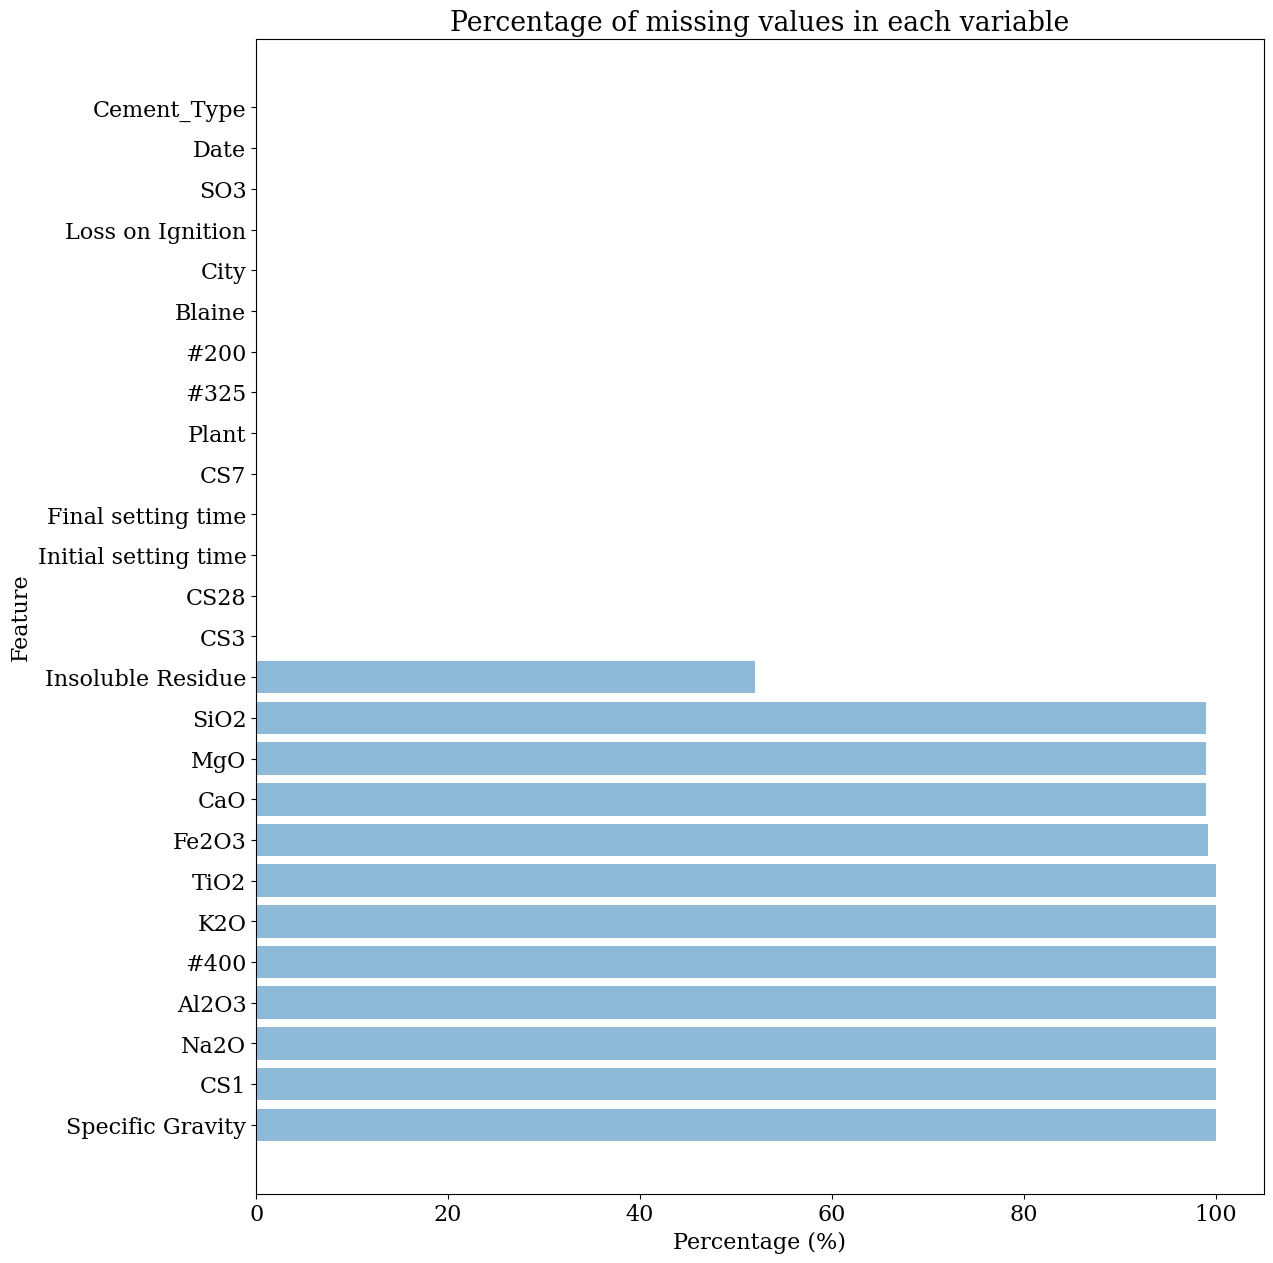

<IPython.core.display.Javascript object>

In [47]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [48]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

,Missing (%) for AY
Specific Gravity,100.000000
CS1,100.000000
Na2O,100.000000
Al2O3,100.000000
#400,100.000000
K2O,100.000000
TiO2,100.000000
Fe2O3,99.179487
CaO,98.974359
MgO,98.974359


<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [49]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

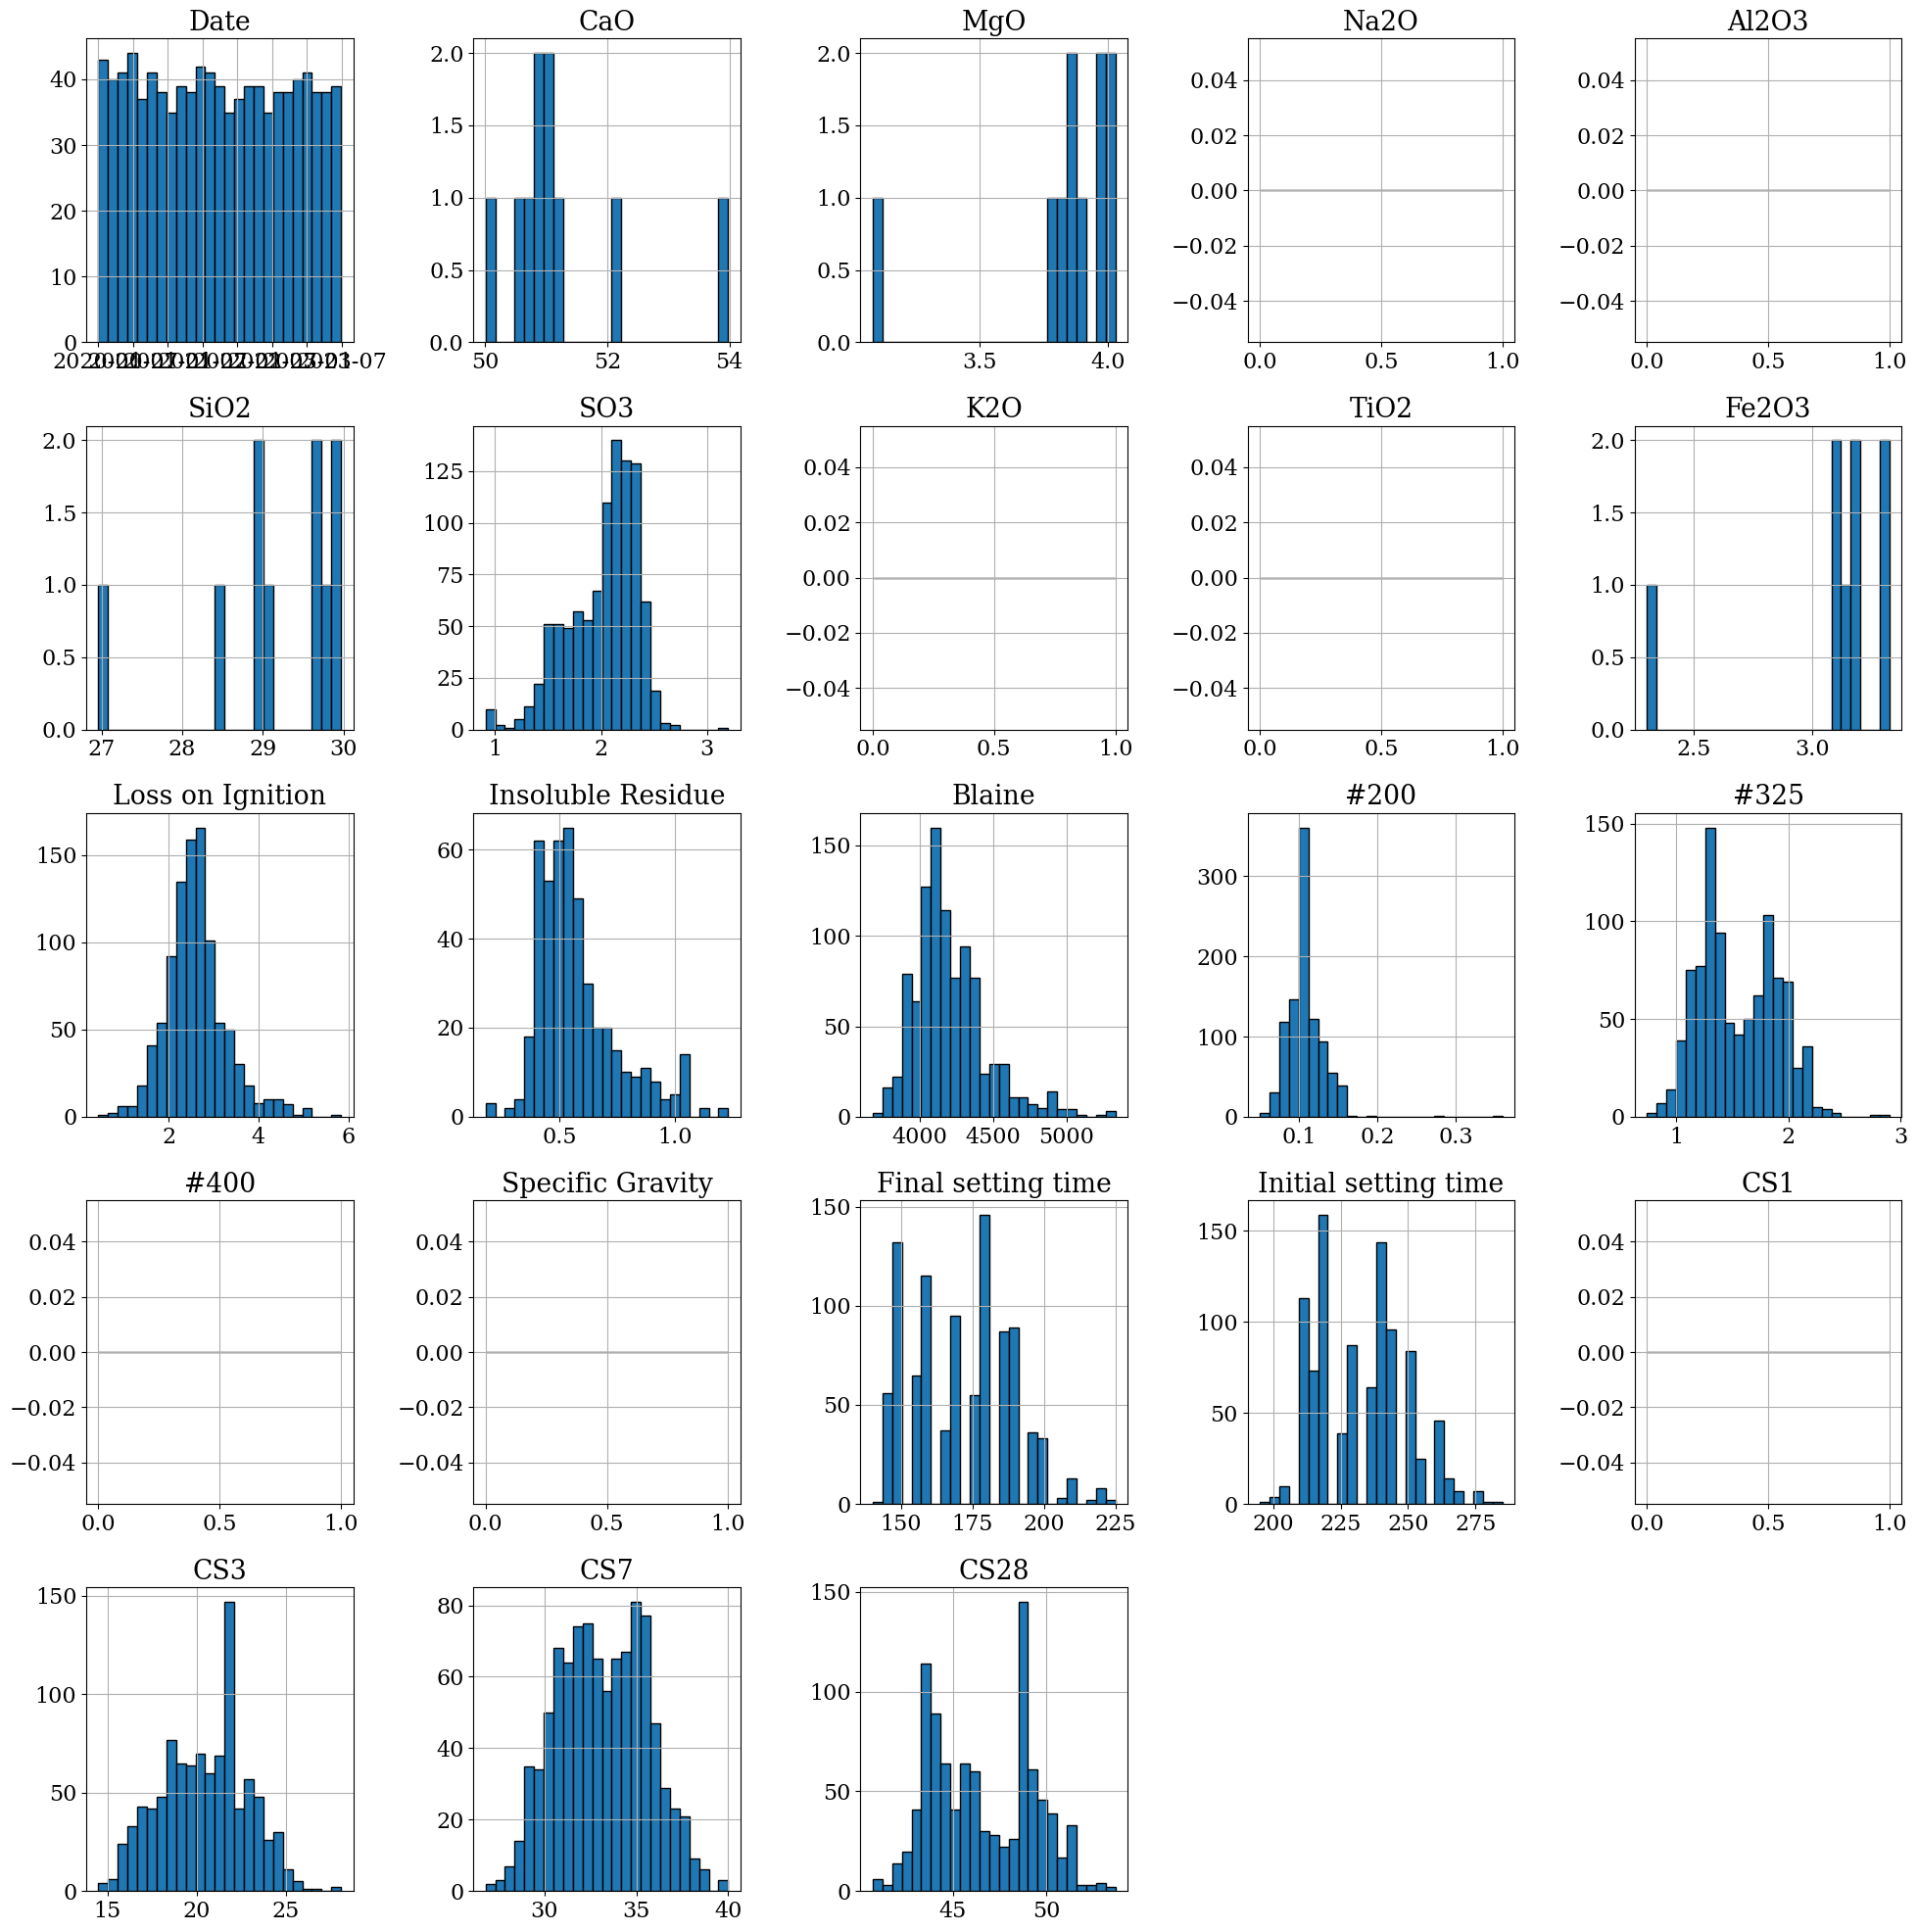

<IPython.core.display.Javascript object>

In [50]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

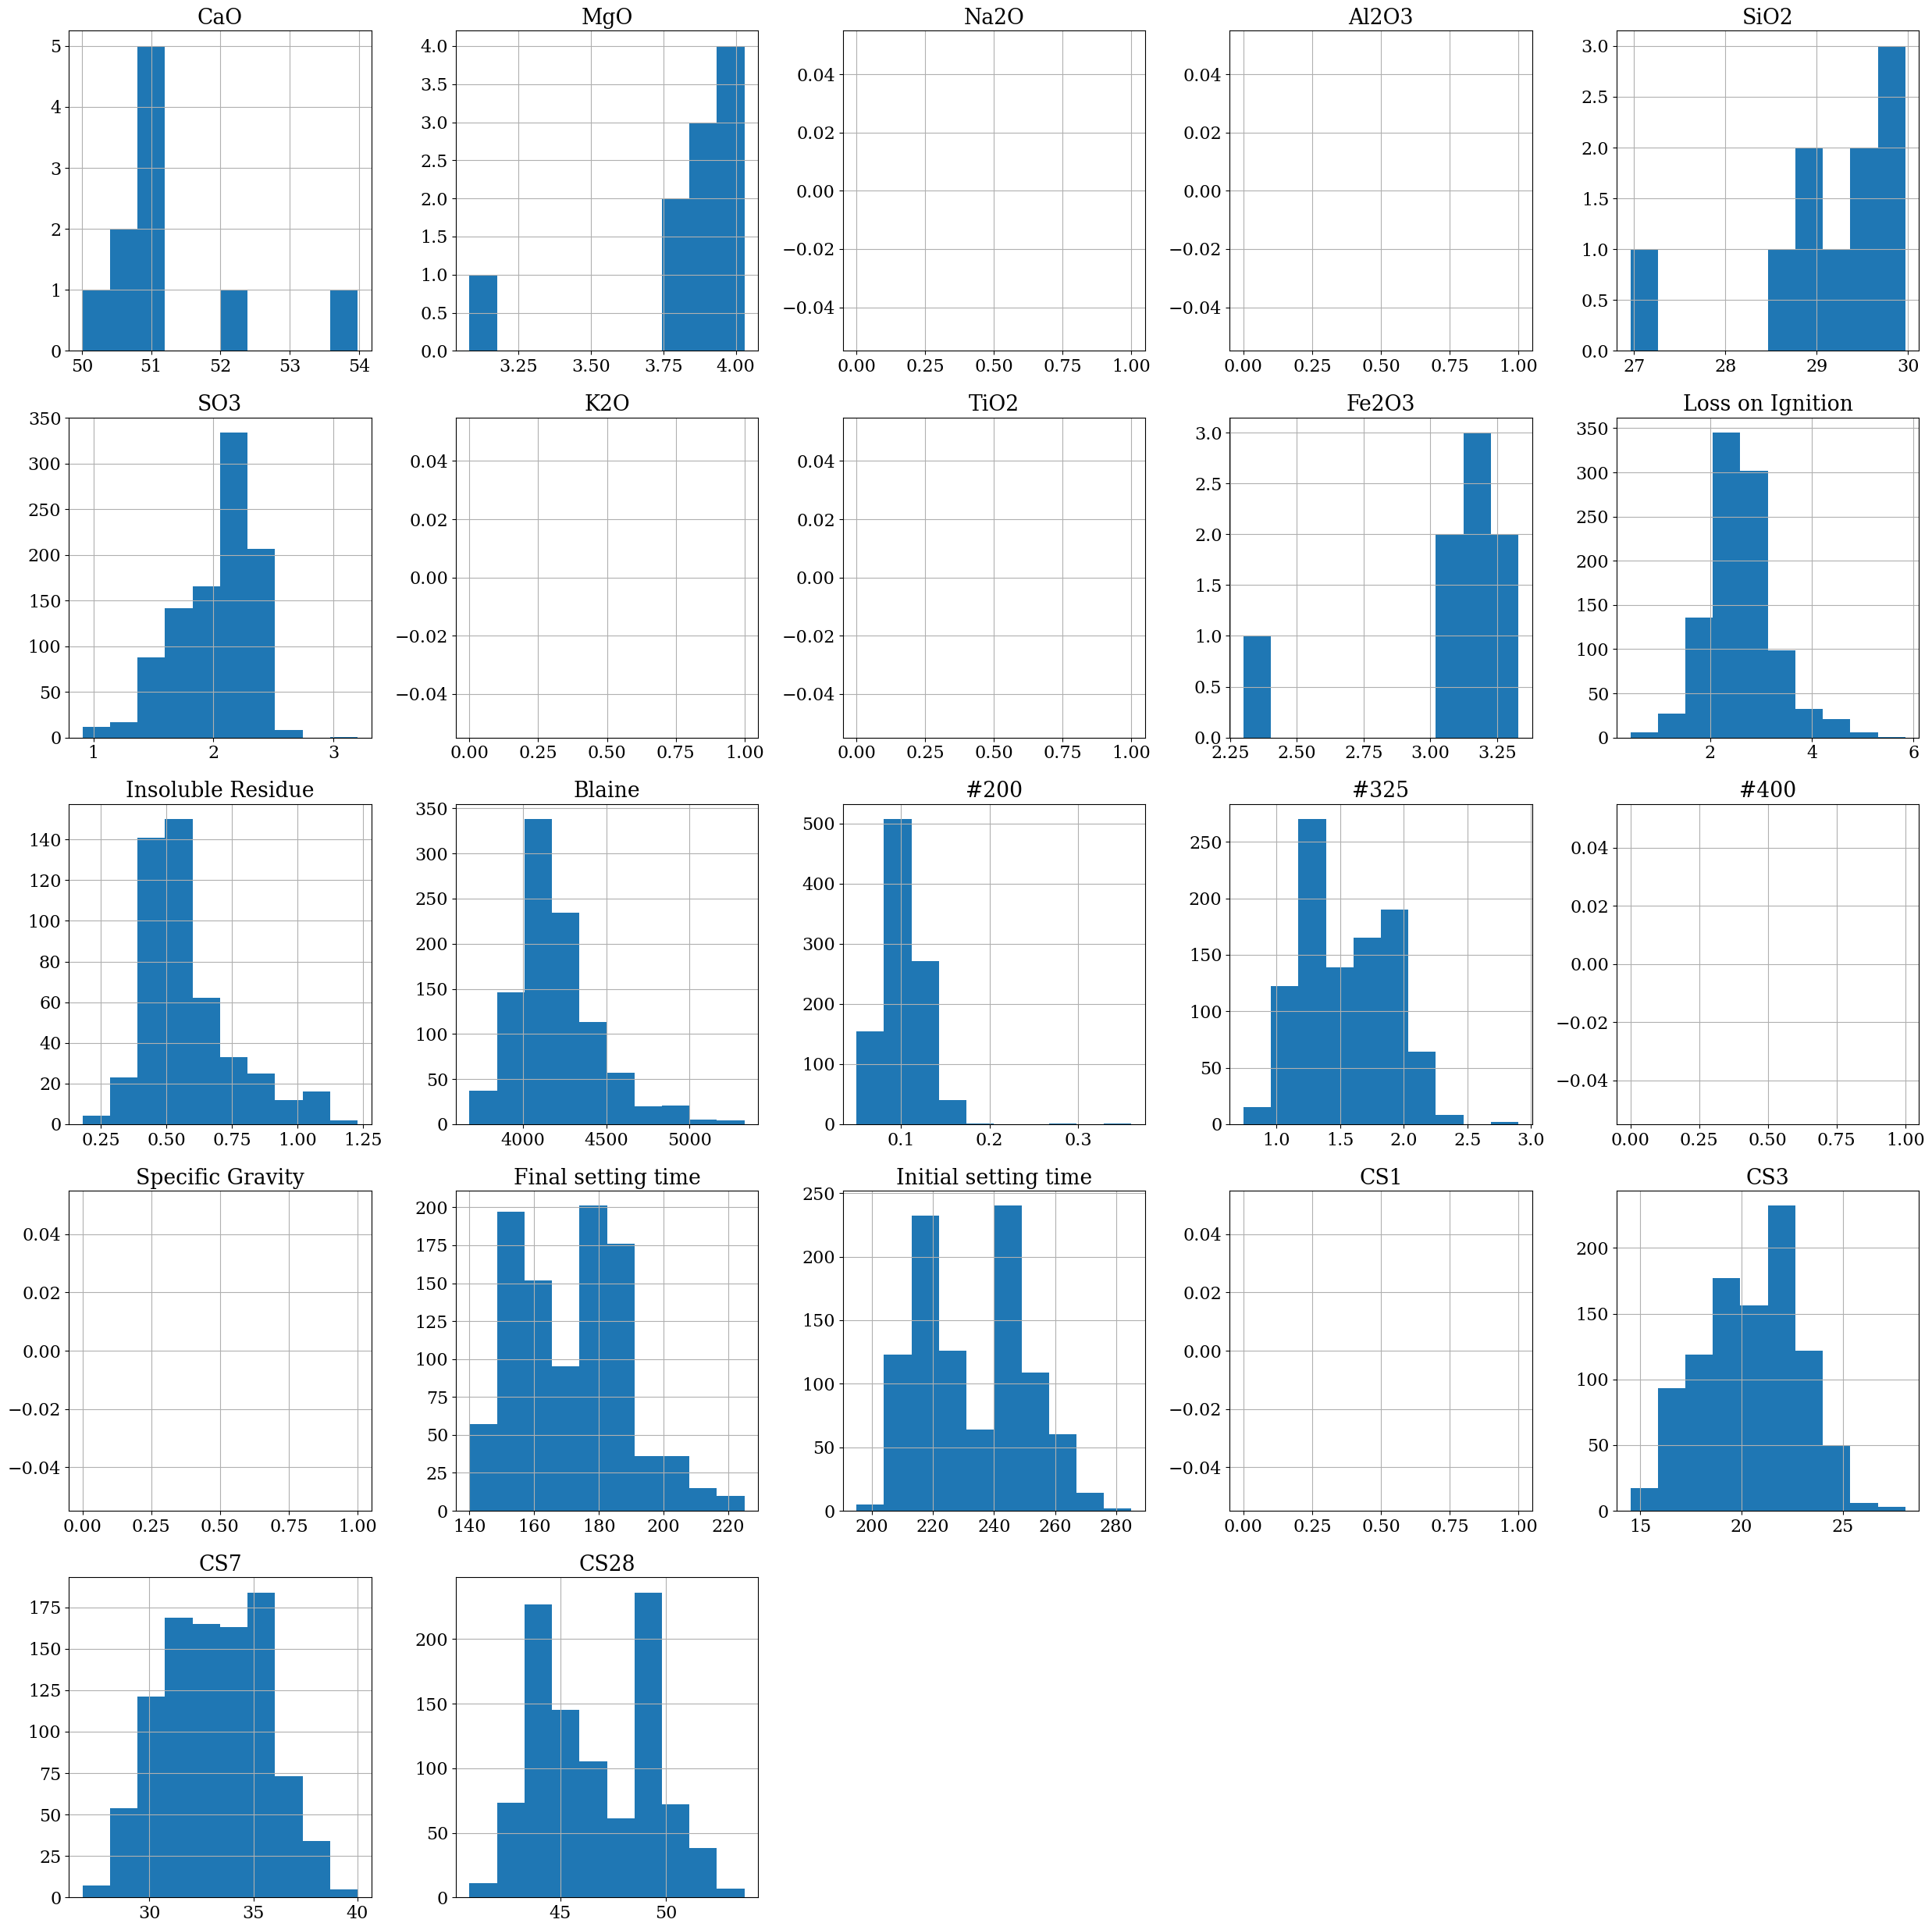

<IPython.core.display.Javascript object>

In [51]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

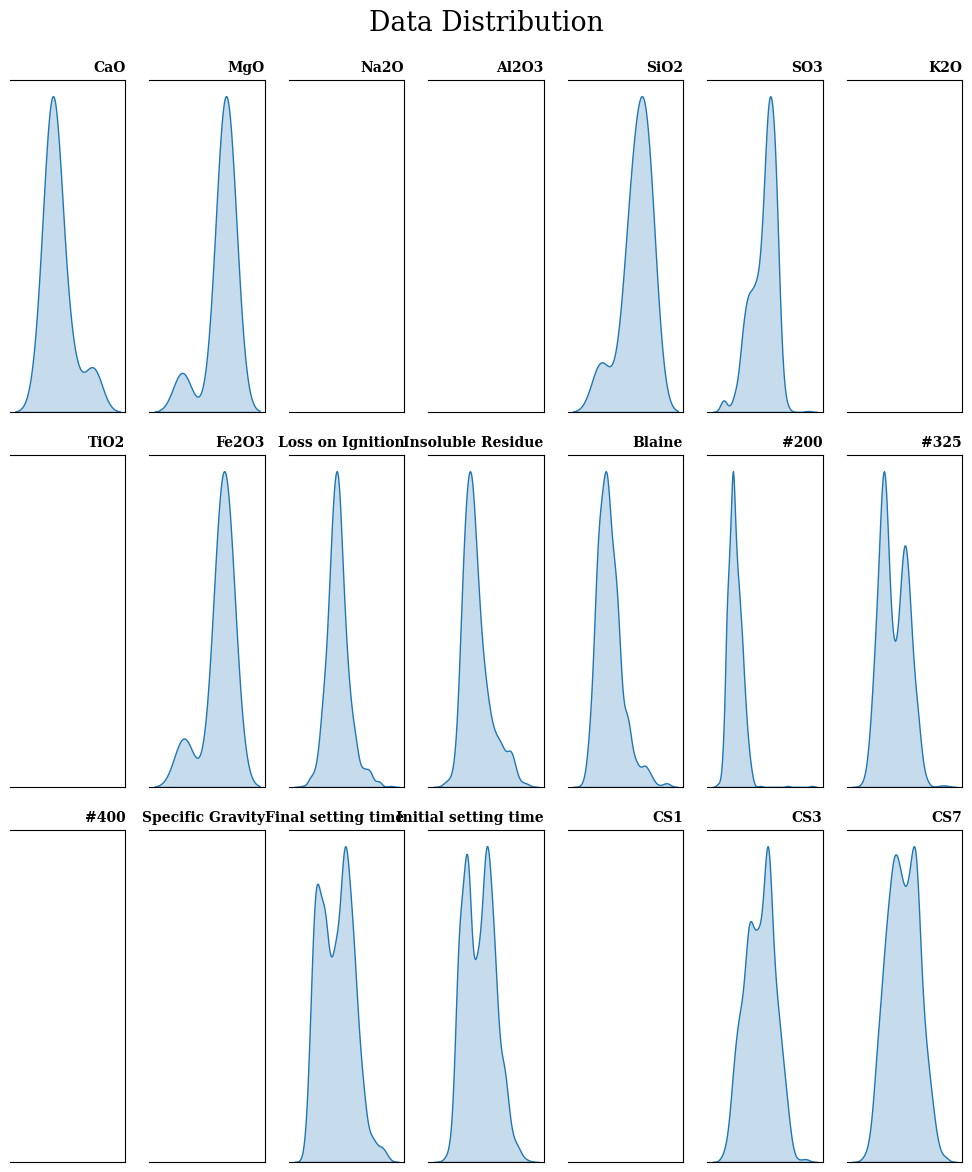

<IPython.core.display.Javascript object>

In [52]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 7, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

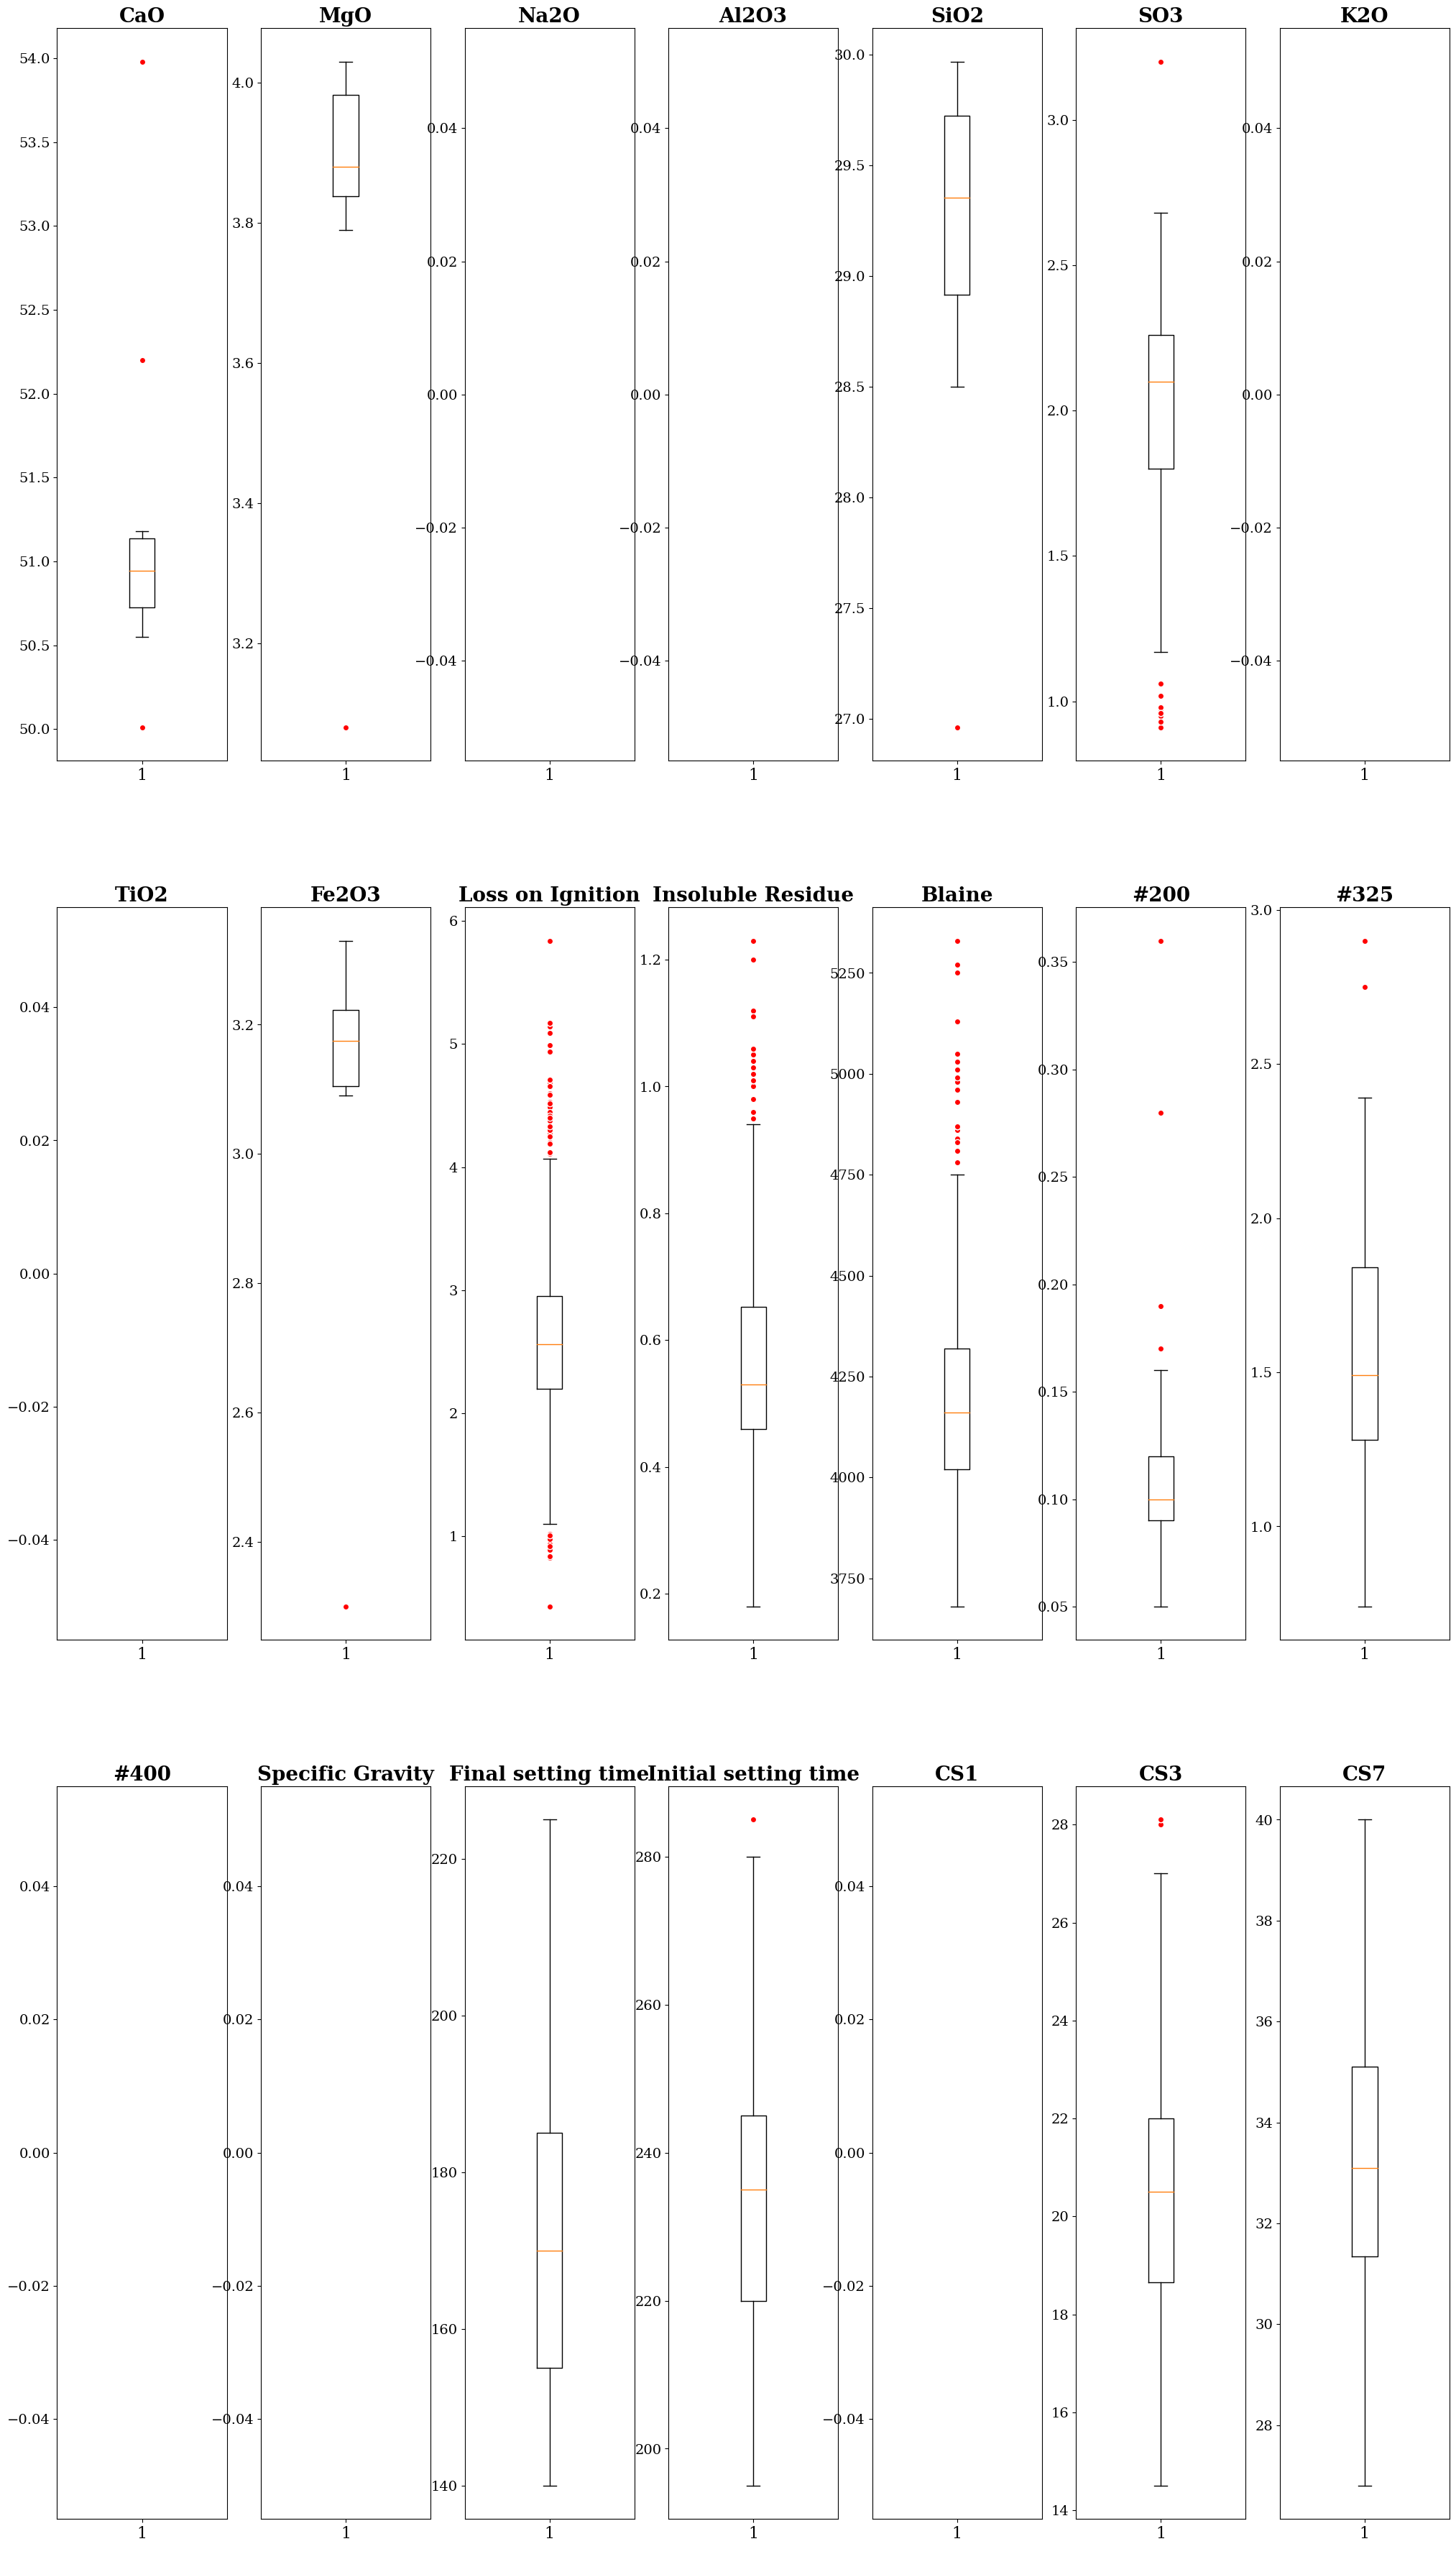

<IPython.core.display.Javascript object>

In [53]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(3, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

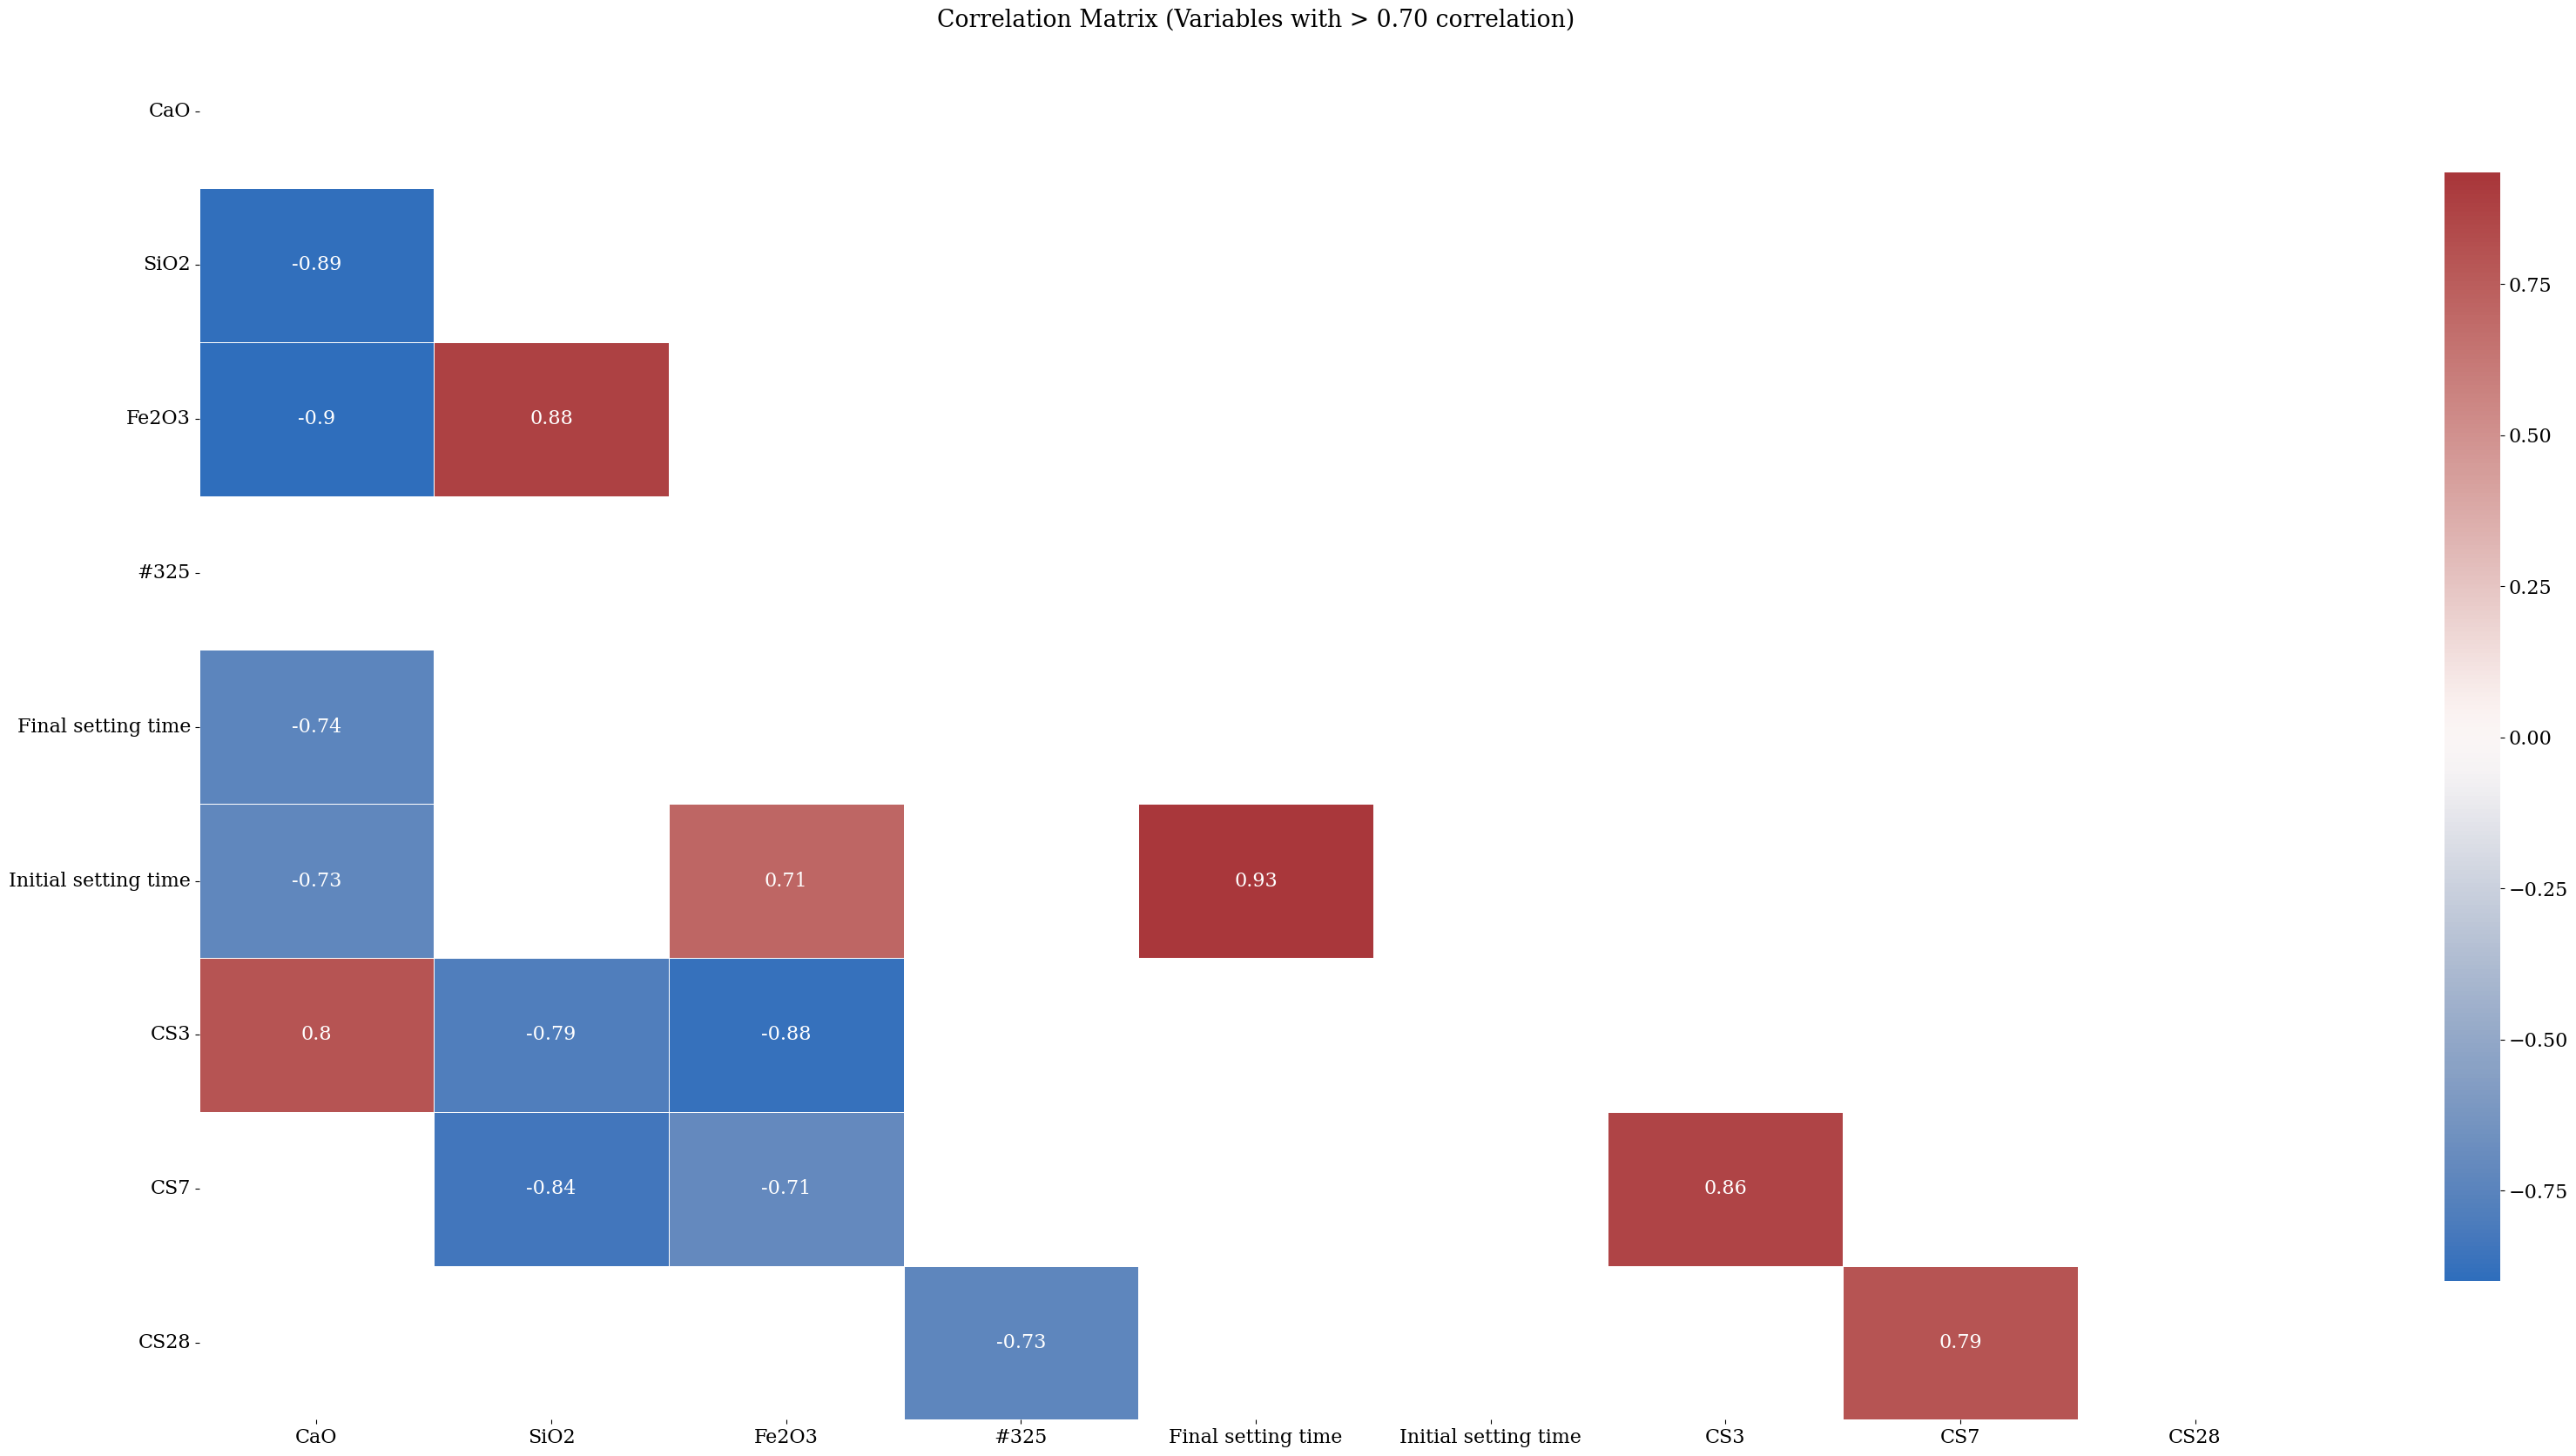

<IPython.core.display.Javascript object>

In [54]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="pearson"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [55]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="pearson")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Final setting time  Initial setting time    0.934084
CaO                 Fe2O3                   0.899576
                    SiO2                    0.885254
SiO2                Fe2O3                   0.879573
Fe2O3               CS3                     0.876652
CS3                 CS7                     0.864784
SiO2                CS7                     0.841270
CaO                 CS3                     0.797348
CS7                 CS28                    0.792671
SiO2                CS3                     0.791525
CaO                 Final setting time      0.739685
#325                CS28                    0.731458
CaO                 Initial setting time    0.725858
Fe2O3               CS7                     0.710075
                    Initial setting time    0.709203
dtype: float64

<IPython.core.display.Javascript object>

In [56]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.792671
#325                  CS28    0.731458
Final setting time    CS28    0.665368
CS3                   CS28    0.653951
Initial setting time  CS28    0.646733
SiO2                  CS28    0.551250
CaO                   CS28    0.412620
#200                  CS28    0.379304
Fe2O3                 CS28    0.363779
Blaine                CS28    0.189397
Insoluble Residue     CS28    0.159258
SO3                   CS28    0.107320
MgO                   CS28    0.083992
Loss on Ignition      CS28    0.009493
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

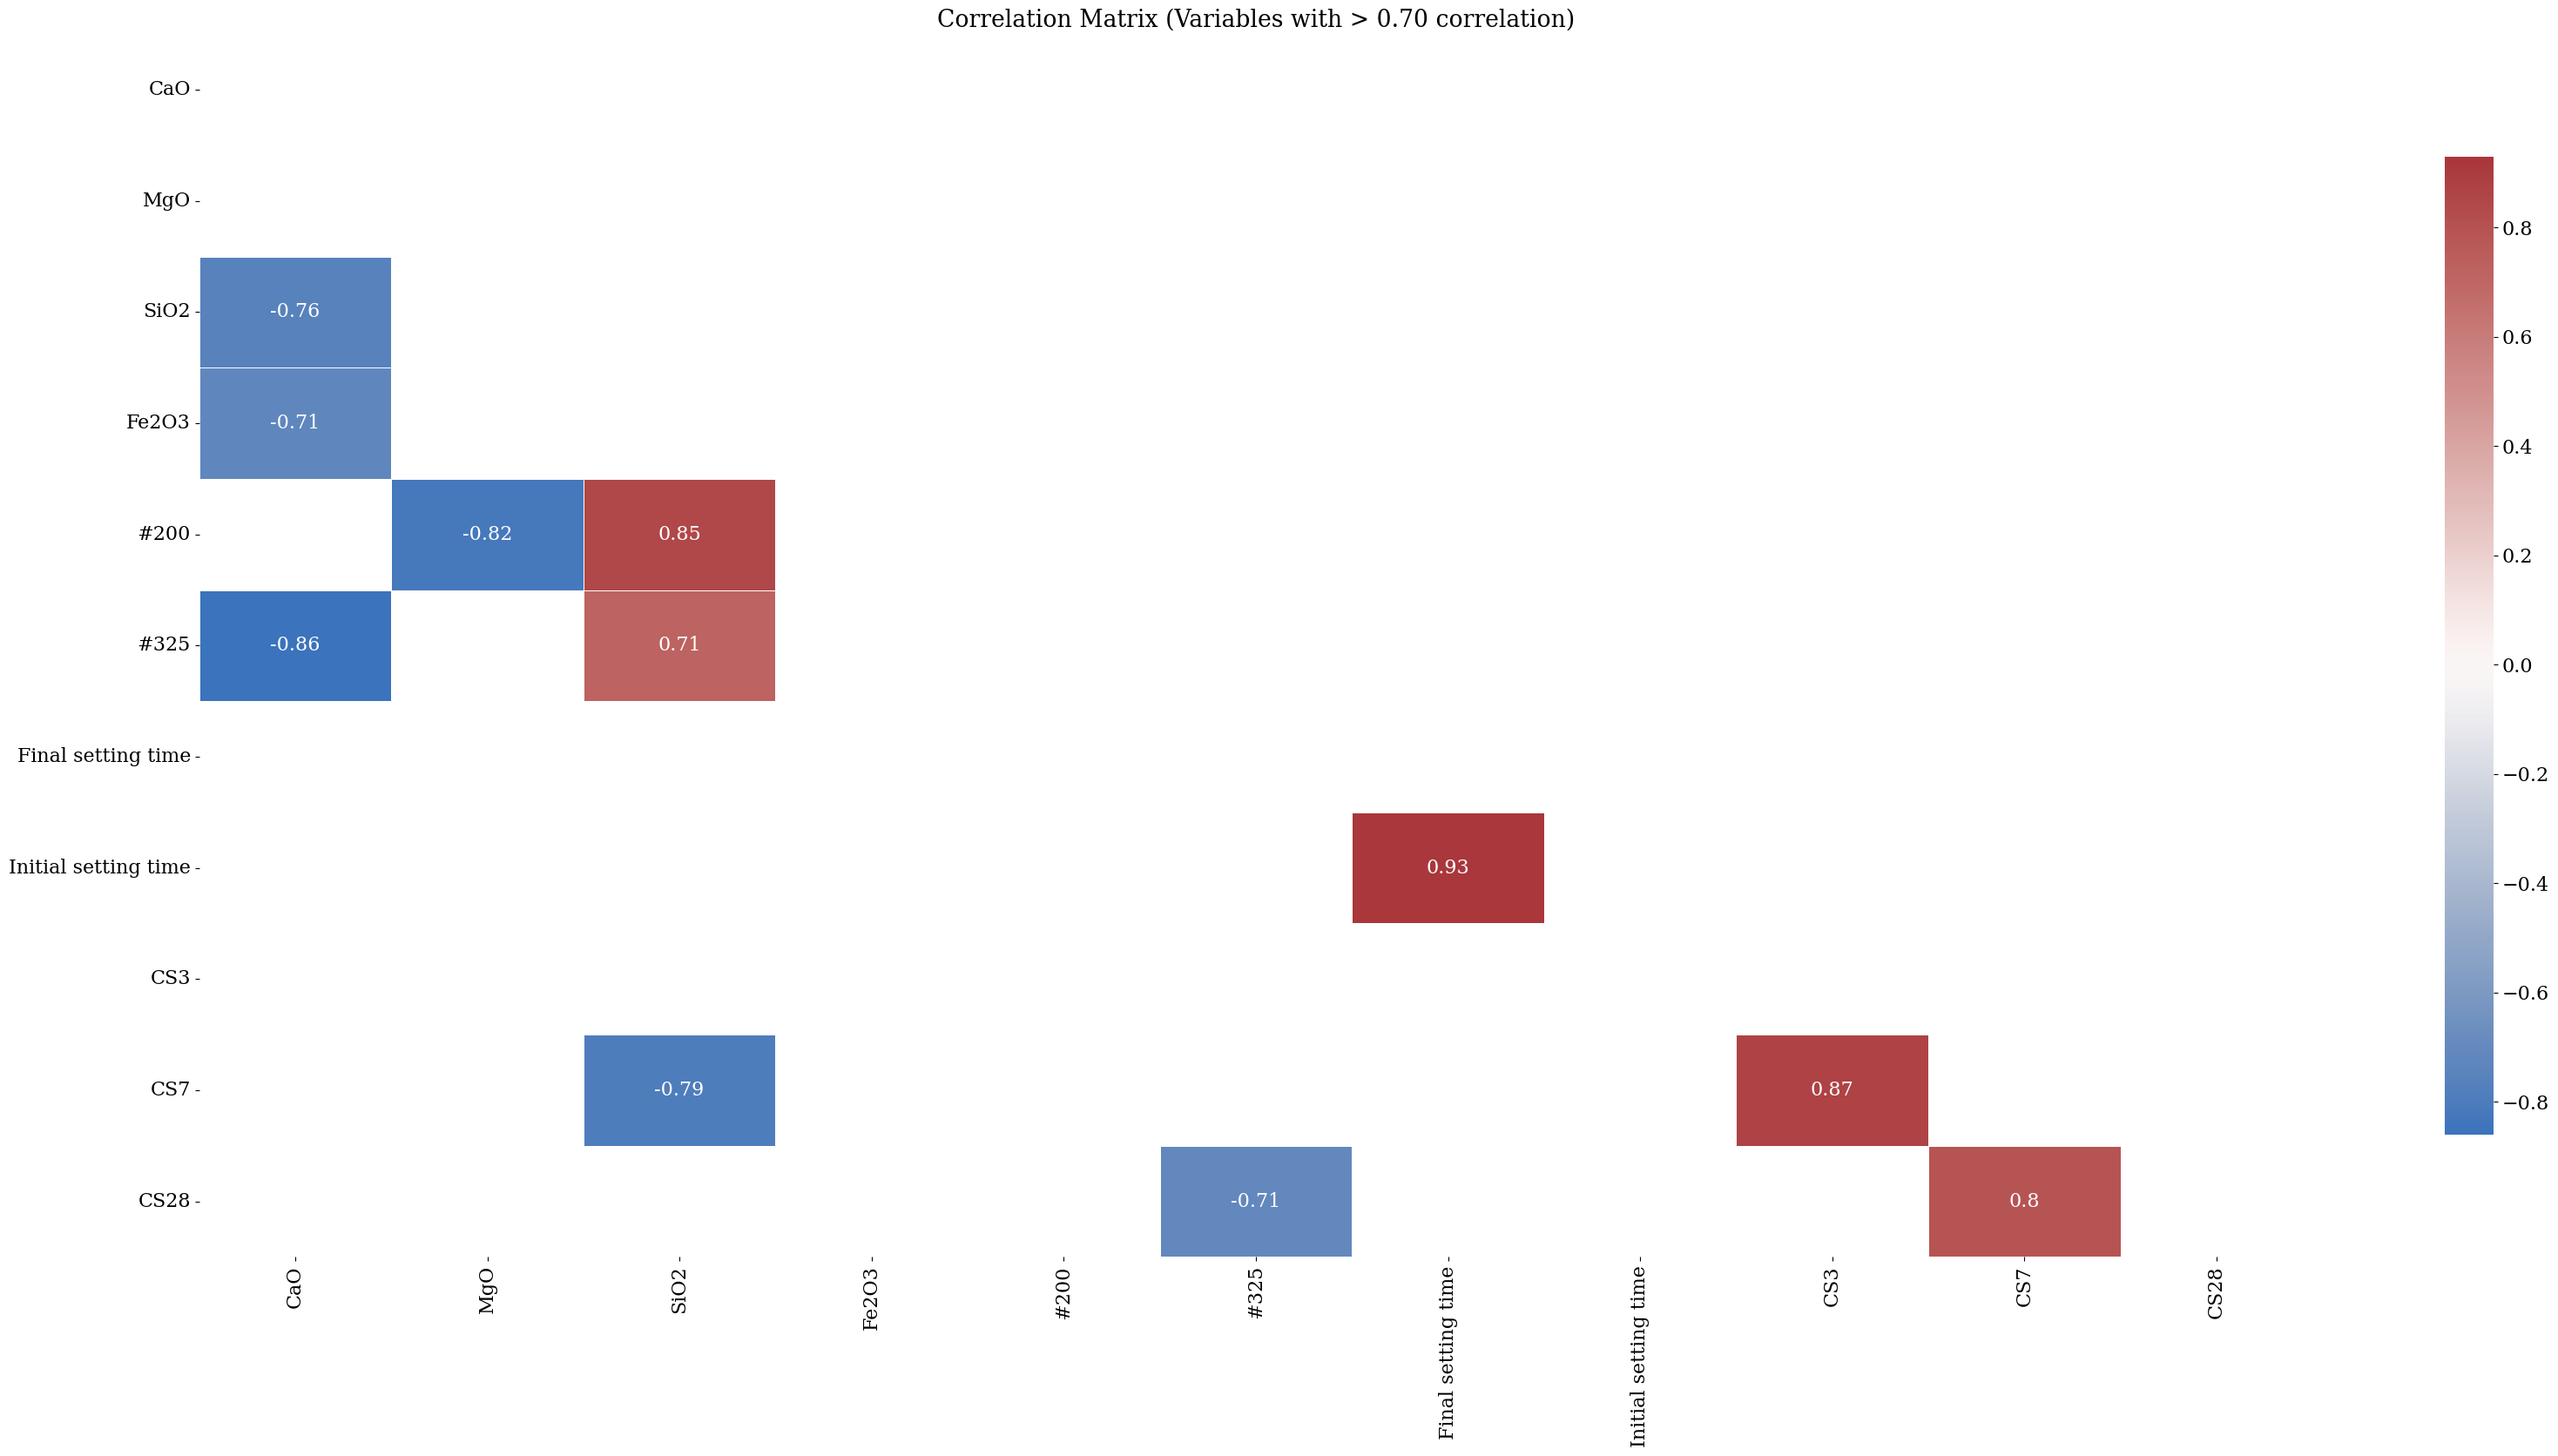

<IPython.core.display.Javascript object>

In [57]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="spearman"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [58]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="spearman")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Final setting time  Initial setting time    0.930081
CS3                 CS7                     0.871800
CaO                 #325                    0.859772
SiO2                #200                    0.852803
MgO                 #200                    0.819757
CS7                 CS28                    0.796323
SiO2                CS7                     0.791471
CaO                 SiO2                    0.757576
                    Fe2O3                   0.714286
SiO2                #325                    0.713428
#325                CS28                    0.712495
dtype: float64

<IPython.core.display.Javascript object>

In [59]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.796323
#325                  CS28    0.712495
Final setting time    CS28    0.667537
CS3                   CS28    0.664246
Initial setting time  CS28    0.649249
SiO2                  CS28    0.575758
#200                  CS28    0.409048
CaO                   CS28    0.345455
Blaine                CS28    0.286649
MgO                   CS28    0.224925
Insoluble Residue     CS28    0.156741
SO3                   CS28    0.109359
Loss on Ignition      CS28    0.036989
Fe2O3                 CS28    0.000000
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

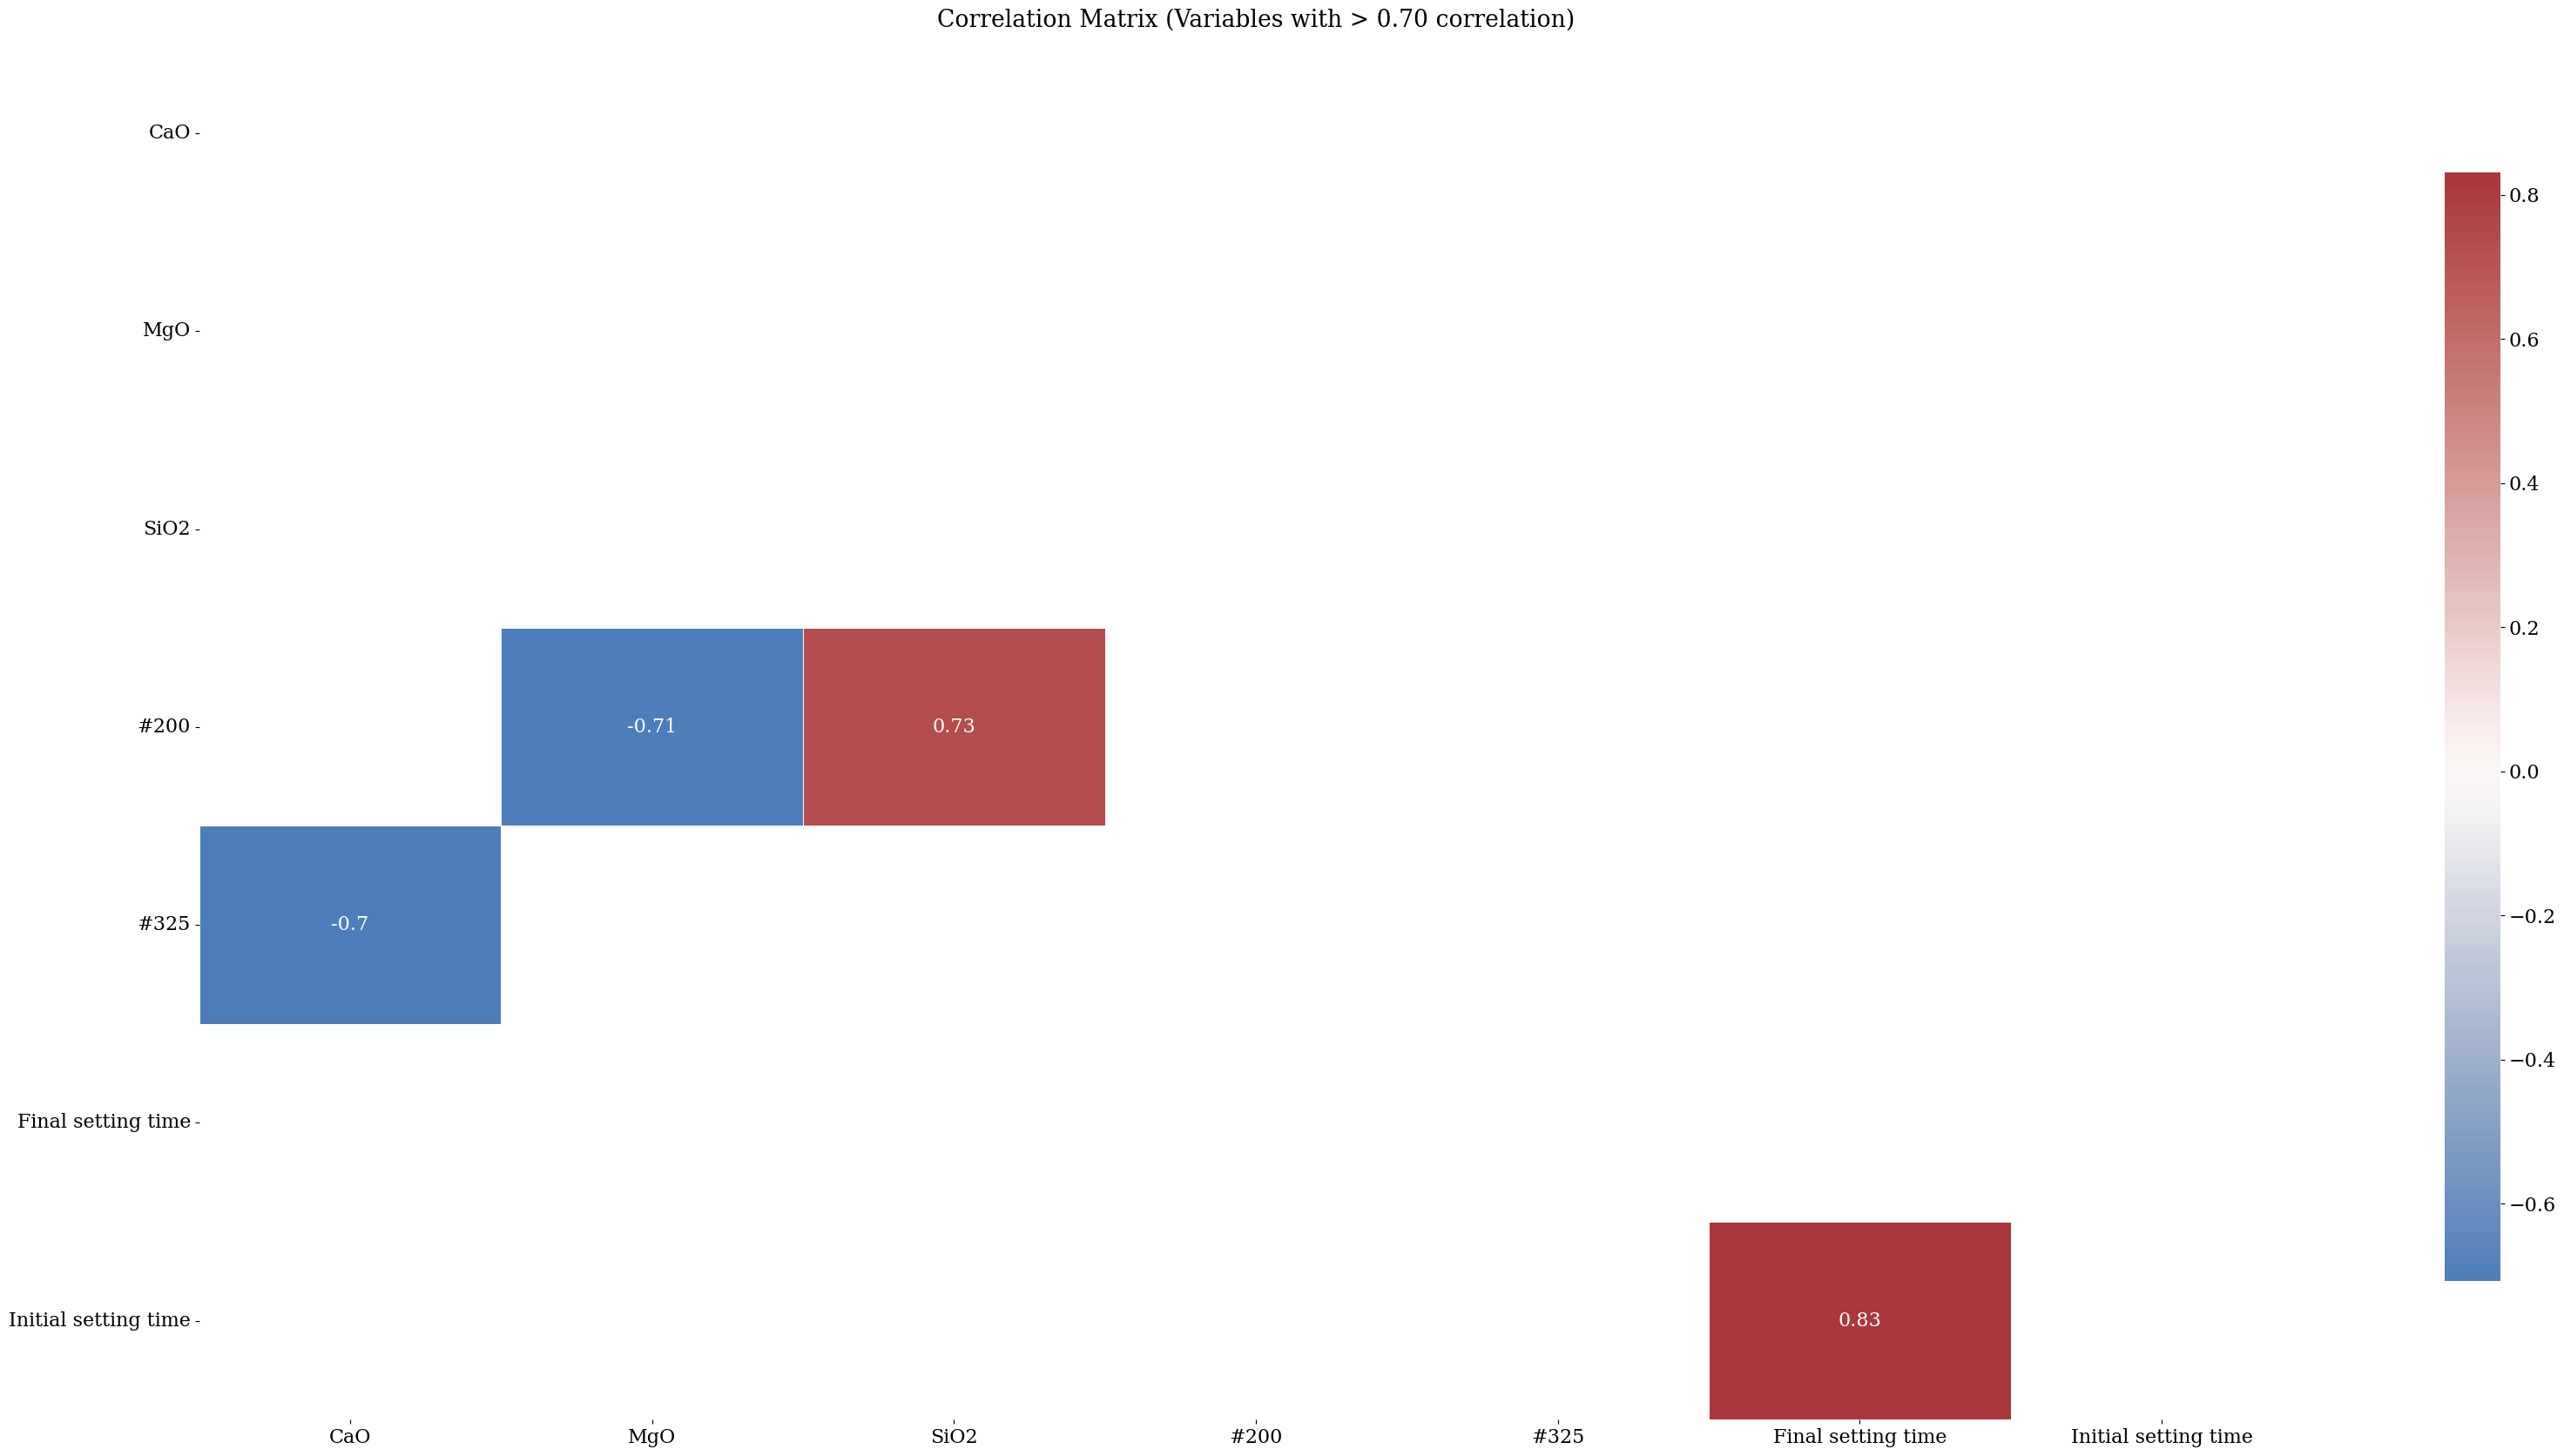

<IPython.core.display.Javascript object>

In [60]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="kendall"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [61]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="kendall")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Final setting time  Initial setting time    0.830678
SiO2                #200                    0.730297
MgO                 #200                    0.707776
CaO                 #325                    0.704727
dtype: float64

<IPython.core.display.Javascript object>

In [62]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.594560
#325                  CS28    0.495527
Final setting time    CS28    0.477919
CS3                   CS28    0.471399
Initial setting time  CS28    0.461285
SiO2                  CS28    0.422222
CaO                   CS28    0.333333
#200                  CS28    0.297467
Blaine                CS28    0.197810
MgO                   CS28    0.179787
Insoluble Residue     CS28    0.106616
SO3                   CS28    0.075588
Loss on Ignition      CS28    0.024145
Fe2O3                 CS28    0.000000
dtype: float64

<IPython.core.display.Javascript object>

#### Bivariate Analysis

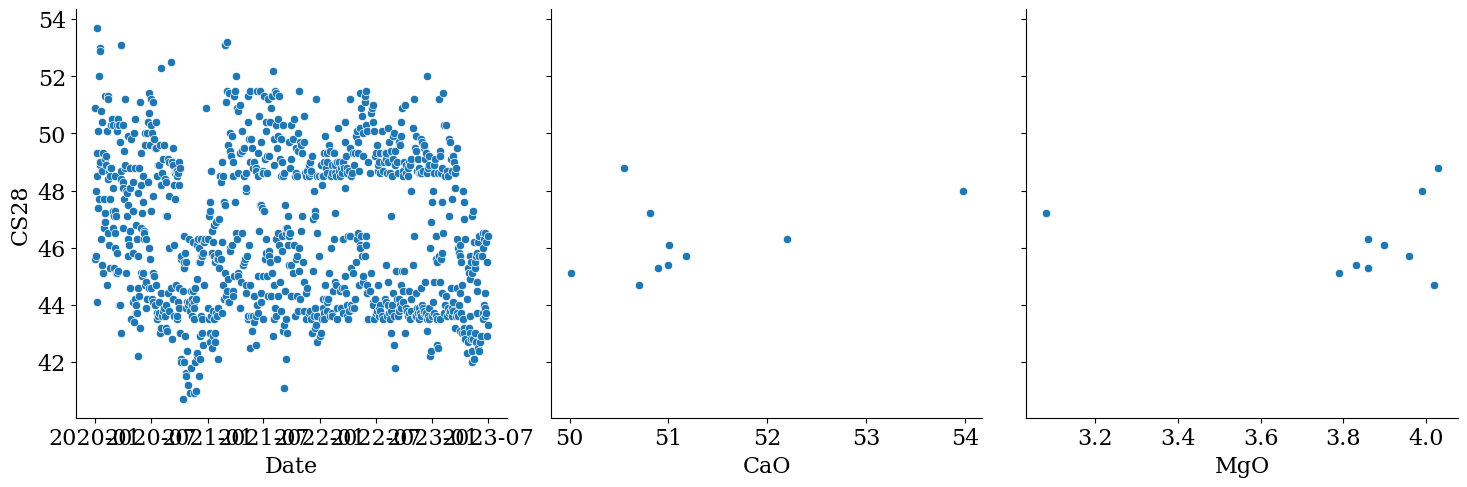

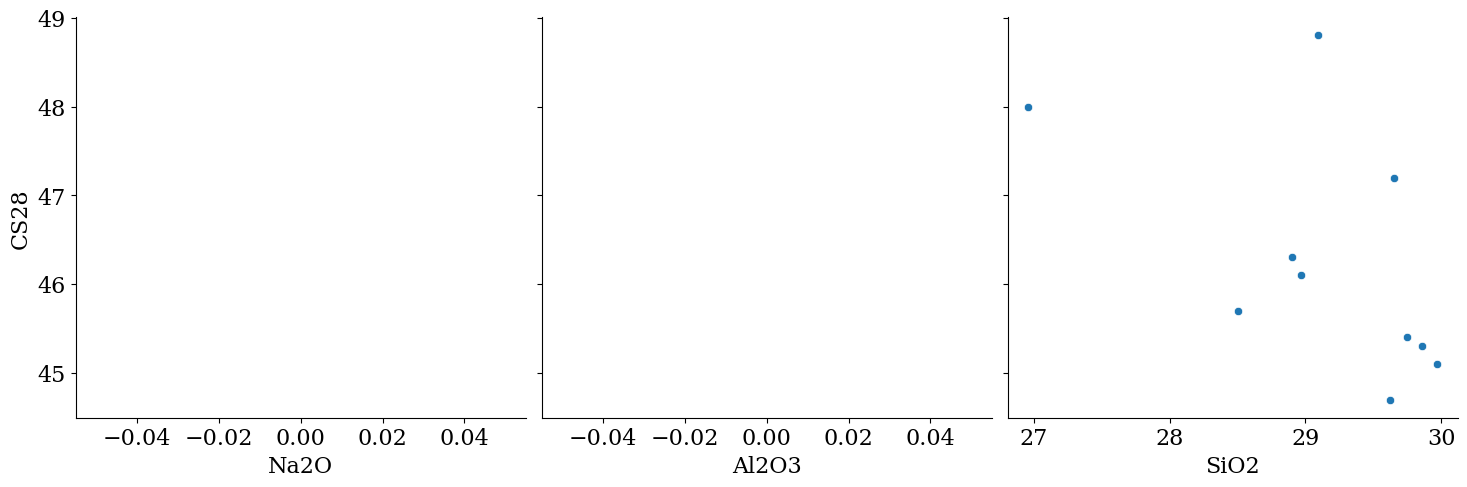

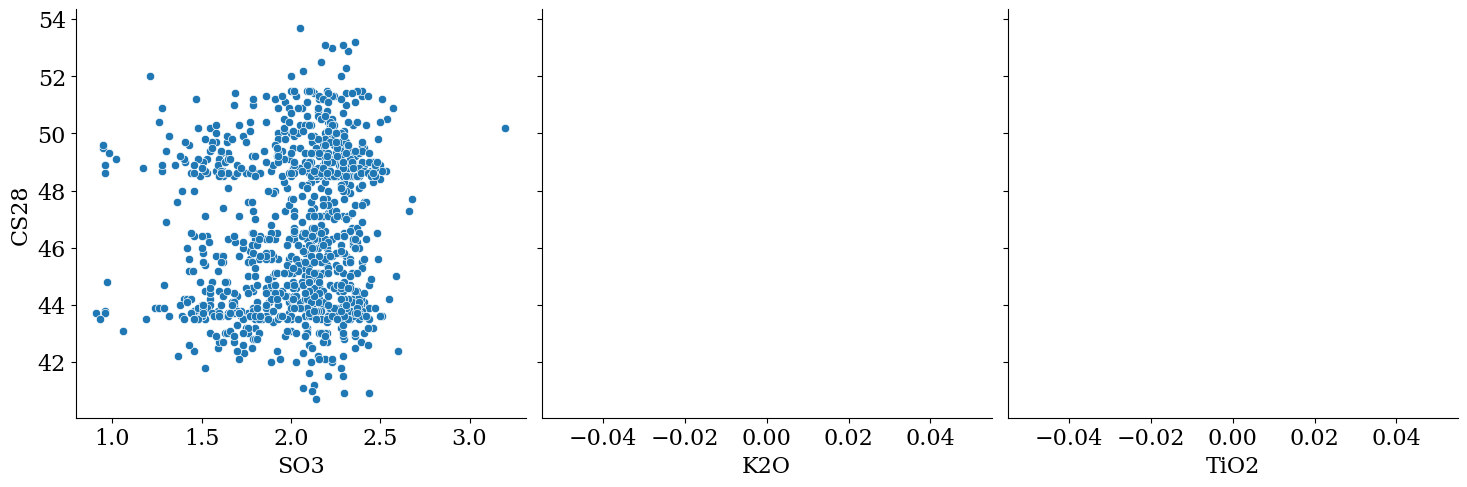

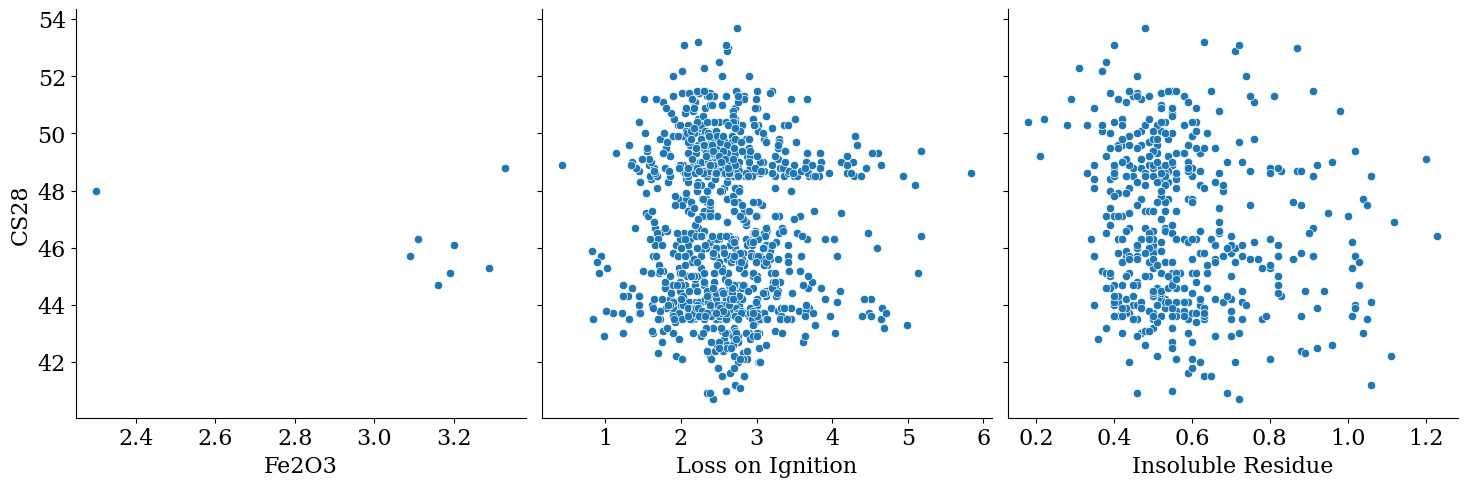

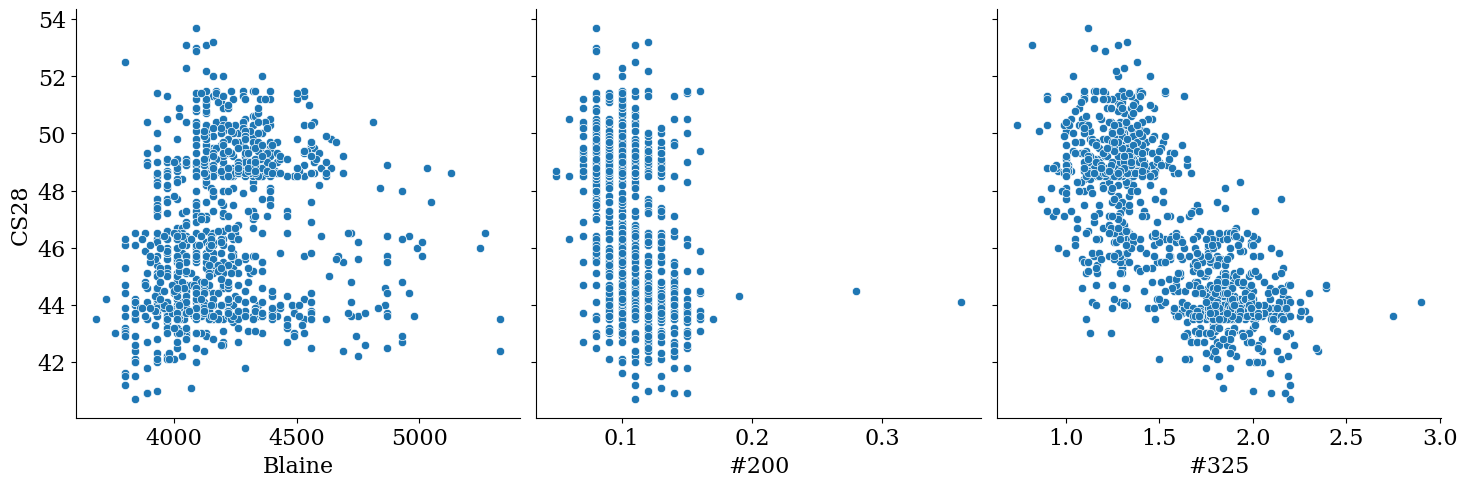

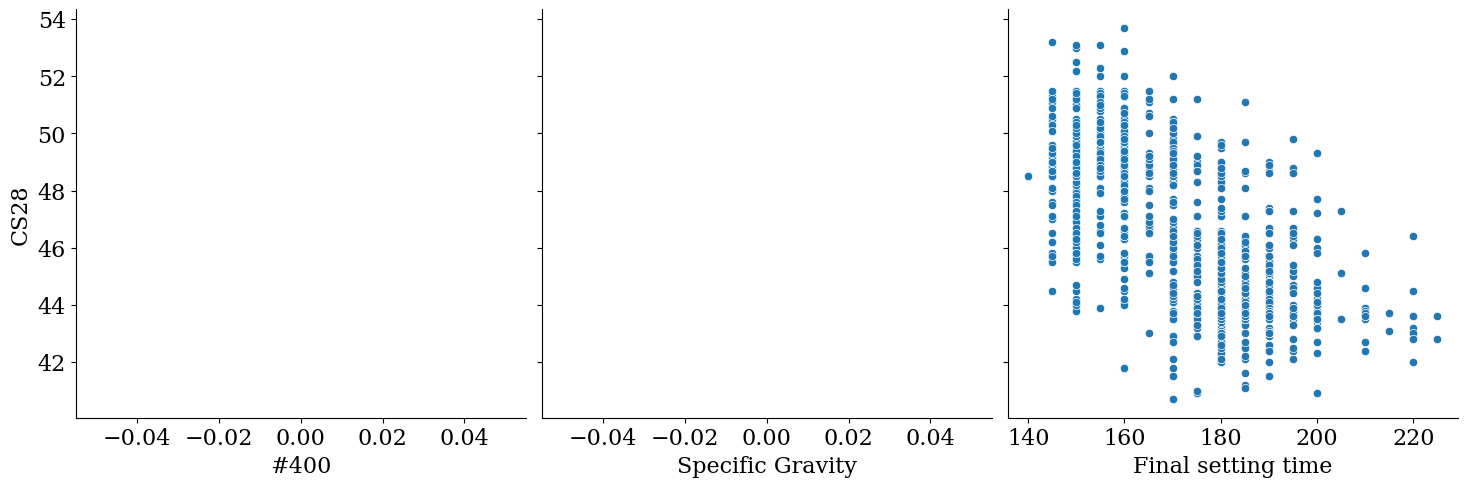

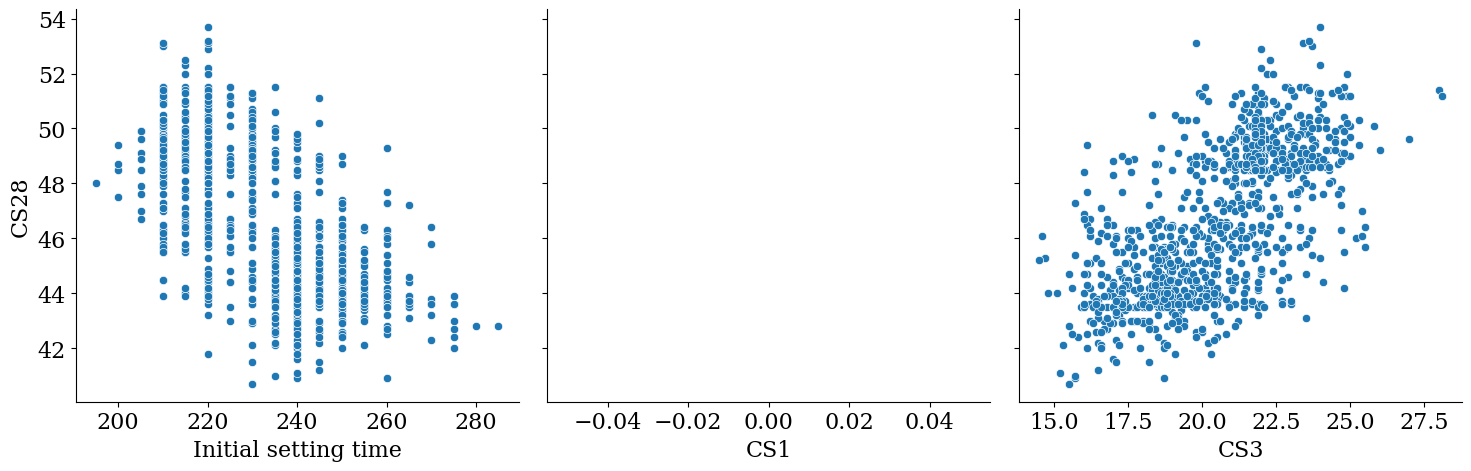

<IPython.core.display.Javascript object>

In [63]:
num_lines = 7
plots_per_line = 3

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [64]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

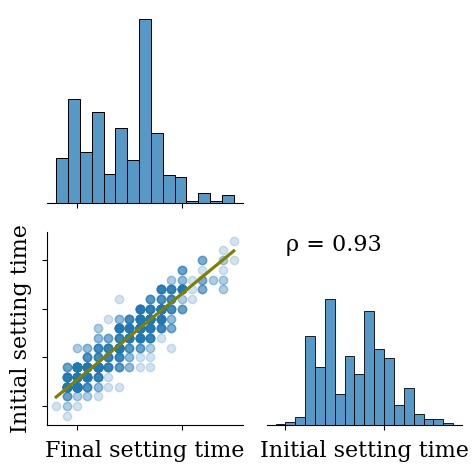

<IPython.core.display.Javascript object>

In [65]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [66]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

364 valid days out of 633


<IPython.core.display.Javascript object>

In [67]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [68]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4, 5, 6}}

<IPython.core.display.Javascript object>

In [69]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        14
      2        13
      3        13
      4        12
      5        17
      6        18
      7        17
      8        17
      9        14
      10       14
      11       16
      12       14
2021  1        17
      2        13
      3        17
      4        13
      5        16
      6        15
      7        17
      8        18
      9        17
      10       12
      11       14
      12       15
2022  1        16
      2        16
      3        15
      4        15
      5        17
      6        12
      7        16
      8        17
      9        16
      10       15
      11       17
      12       15
2023  1        16
      2        12
      3        14
      4        11
      5        17
      6        13
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

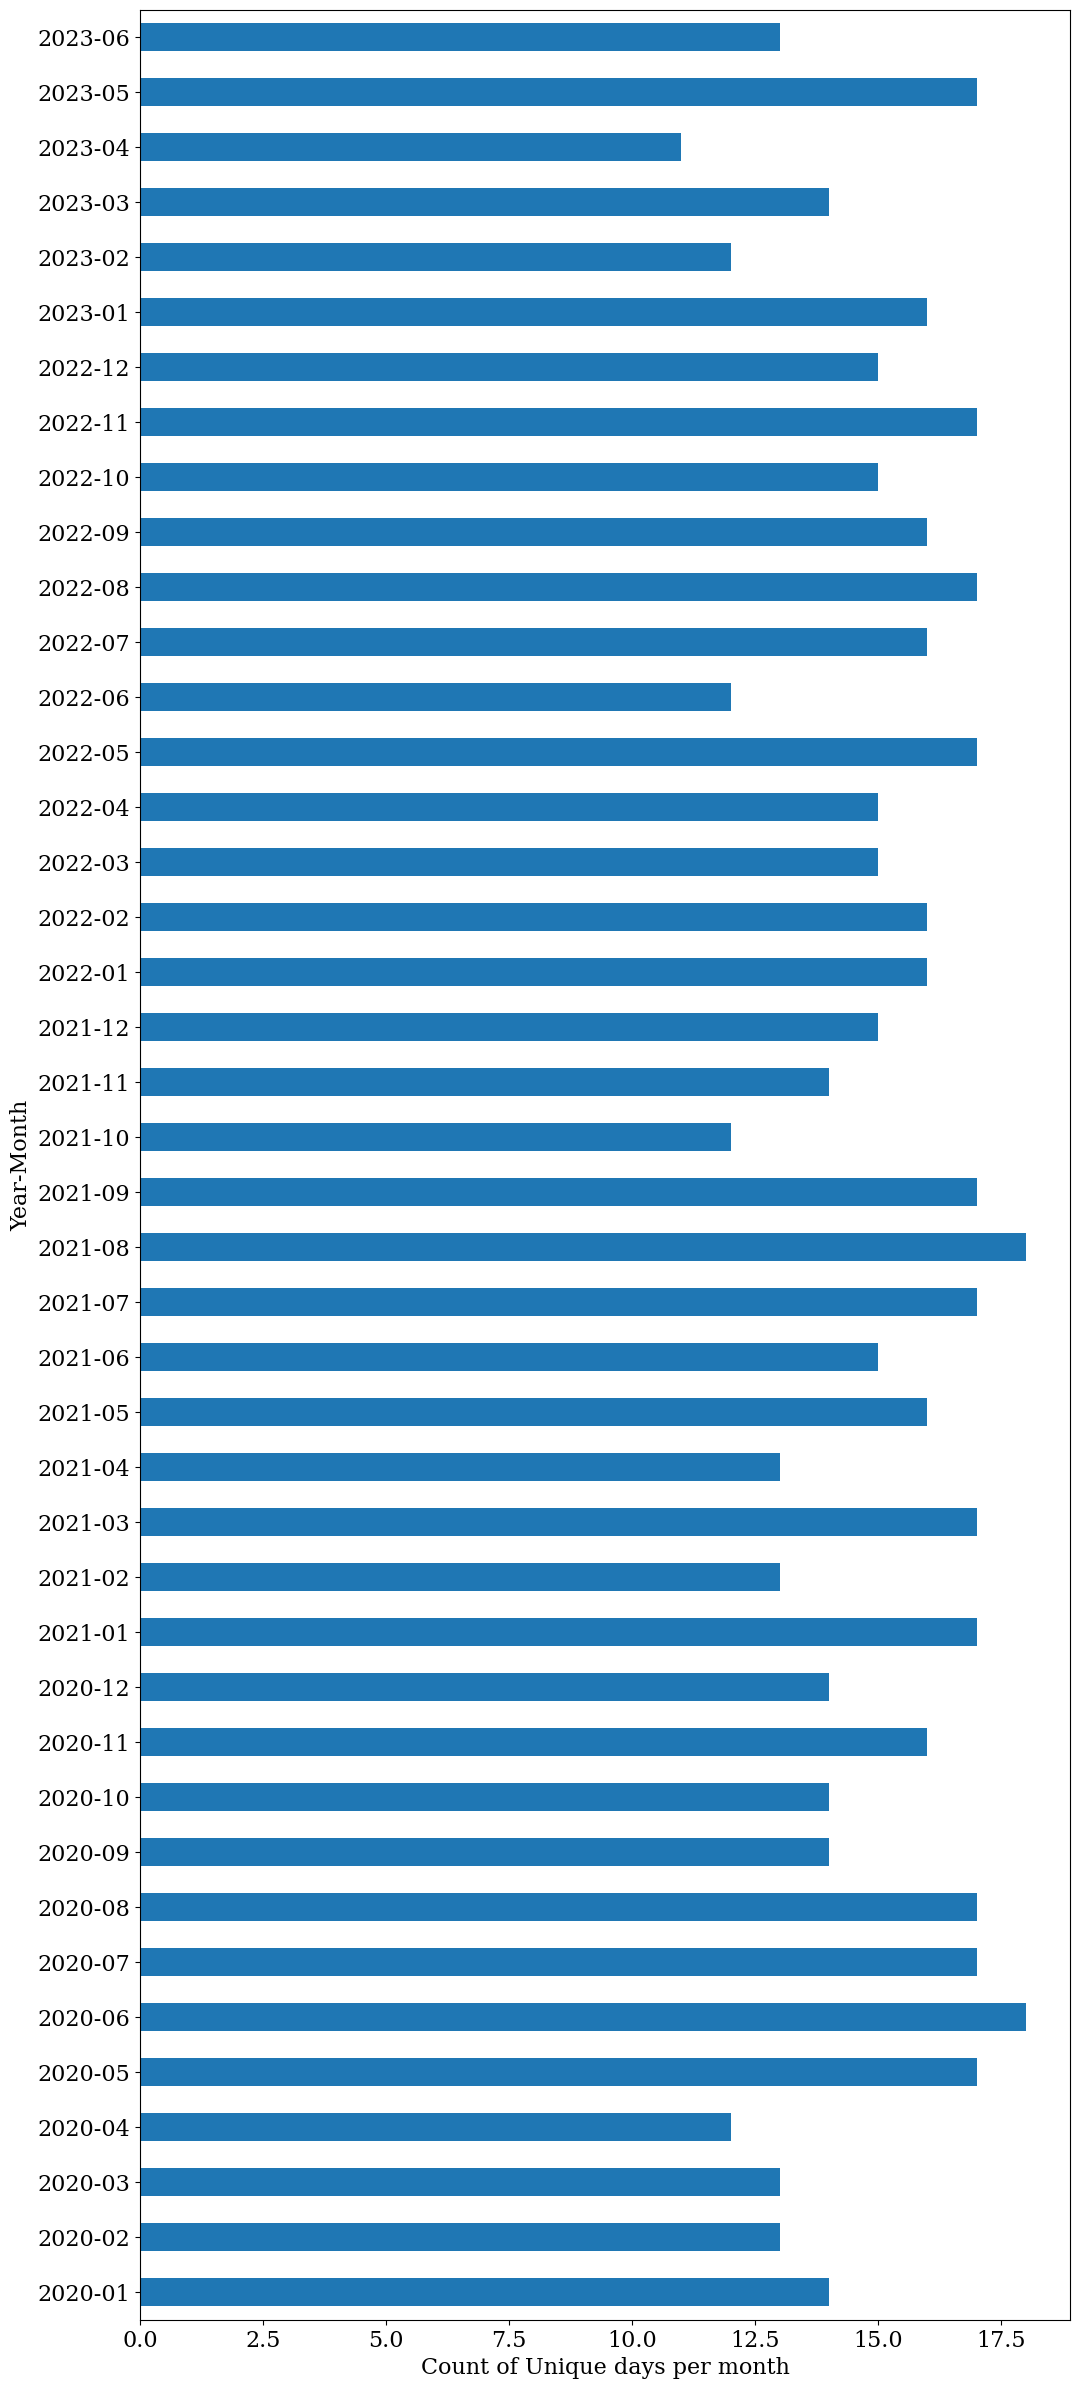

<IPython.core.display.Javascript object>

In [70]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [71]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        25
      2        25
      3        24
      4        22
      5        26
      6        26
      7        26
      8        24
      9        22
      10       25
      11       22
      12       19
2021  1        26
      2        20
      3        24
      4        19
      5        25
      6        24
      7        25
      8        27
      9        26
      10       20
      11       20
      12       21
2022  1        25
      2        21
      3        24
      4        21
      5        25
      6        18
      7        21
      8        26
      9        23
      10       22
      11       24
      12       26
2023  1        25
      2        19
      3        25
      4        20
      5        25
      6        22
Name: size, dtype: int64


<IPython.core.display.Javascript object>

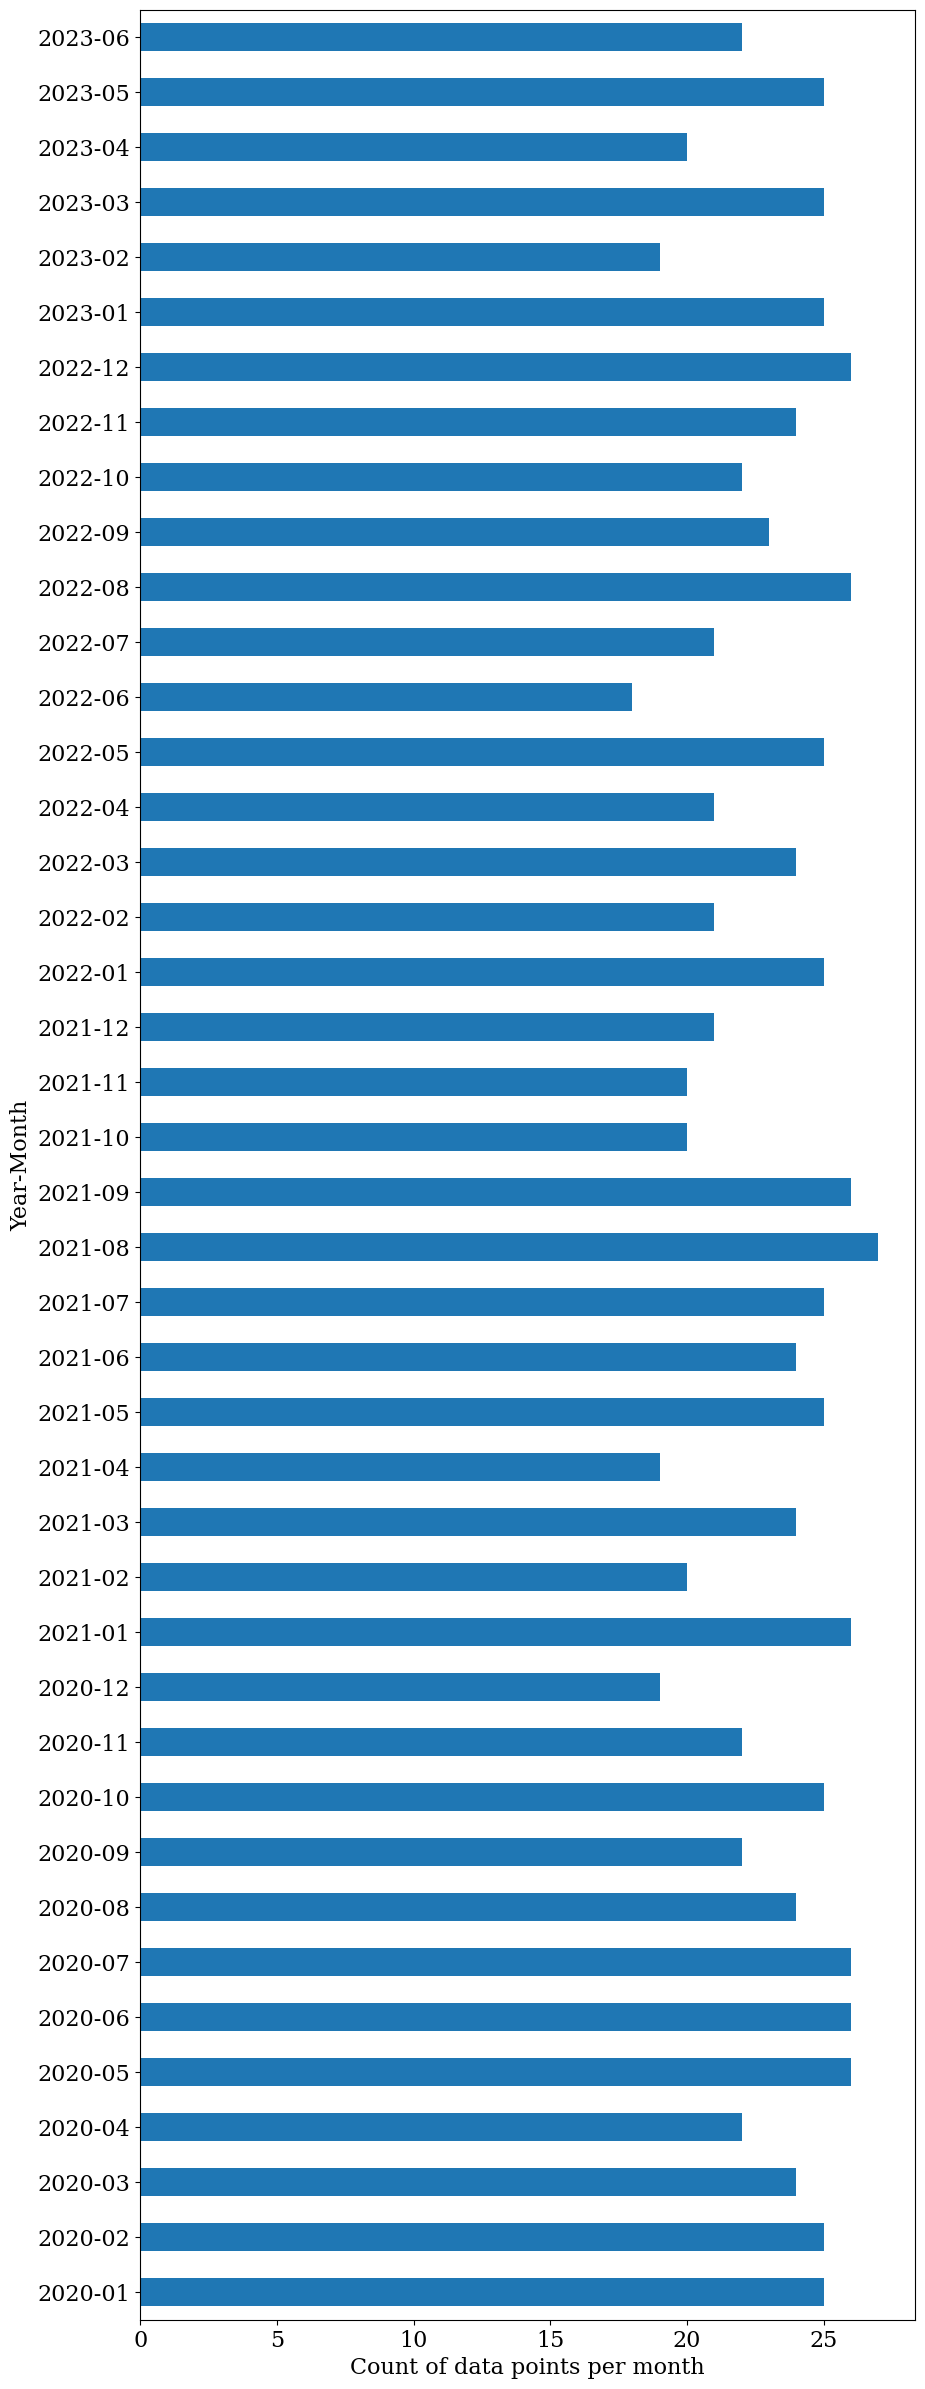

<IPython.core.display.Javascript object>

In [72]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [73]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2022-6 has the minimum number of days with samples - 18
2021-8 has the maximum number of days with samples - 27


<IPython.core.display.Javascript object>

In [74]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2020: 23, 2021: 23, 2022: 23, 2023: 22}

Mean number of observations - all years
23


<IPython.core.display.Javascript object>

In [75]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

,DayCount
count,633.000000
mean,1.540284
std,0.508197
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000


<IPython.core.display.Javascript object>

In [76]:
day_counts[["DayCount"]].value_counts()

DayCount
2           336
1           294
3             3
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [77]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

,Year,Month,Day,DayCount
277,2021,7,13,3
375,2022,1,25,3
441,2022,5,31,3


<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

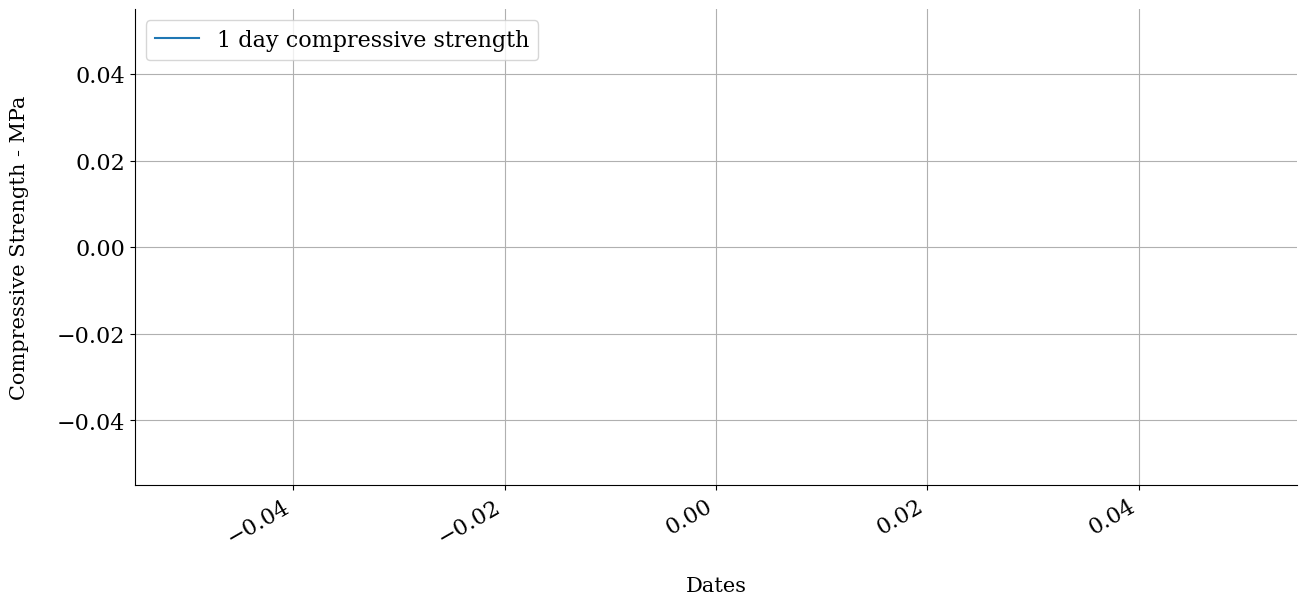

<IPython.core.display.Javascript object>

In [78]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

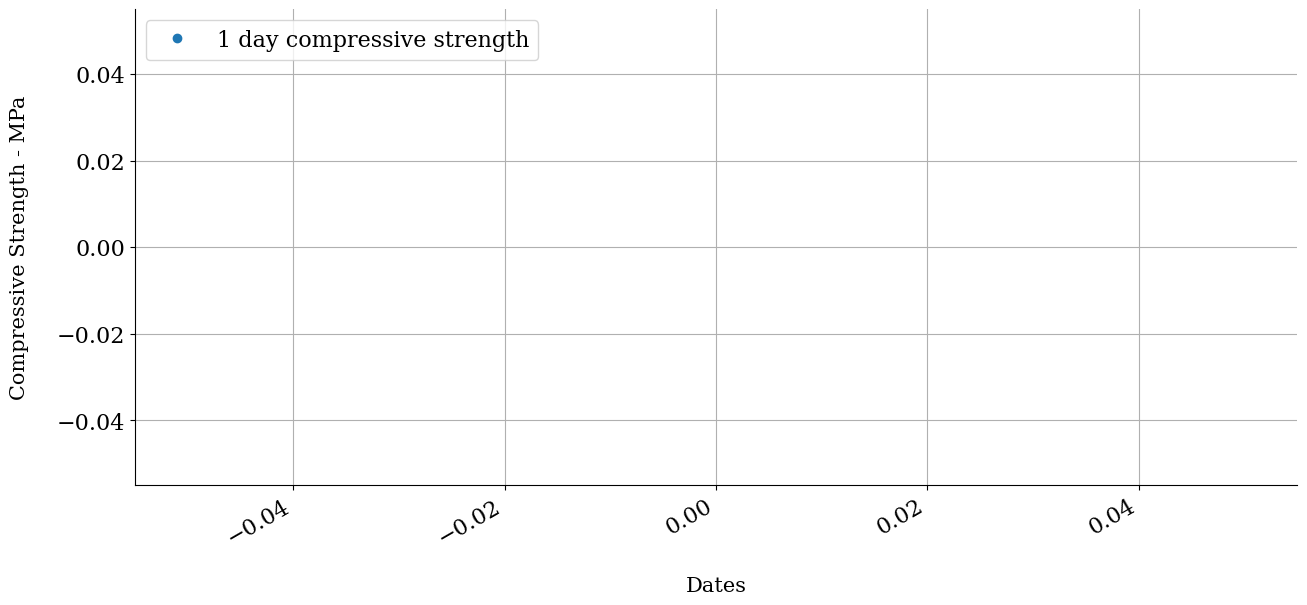

<IPython.core.display.Javascript object>

In [79]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 3 Days

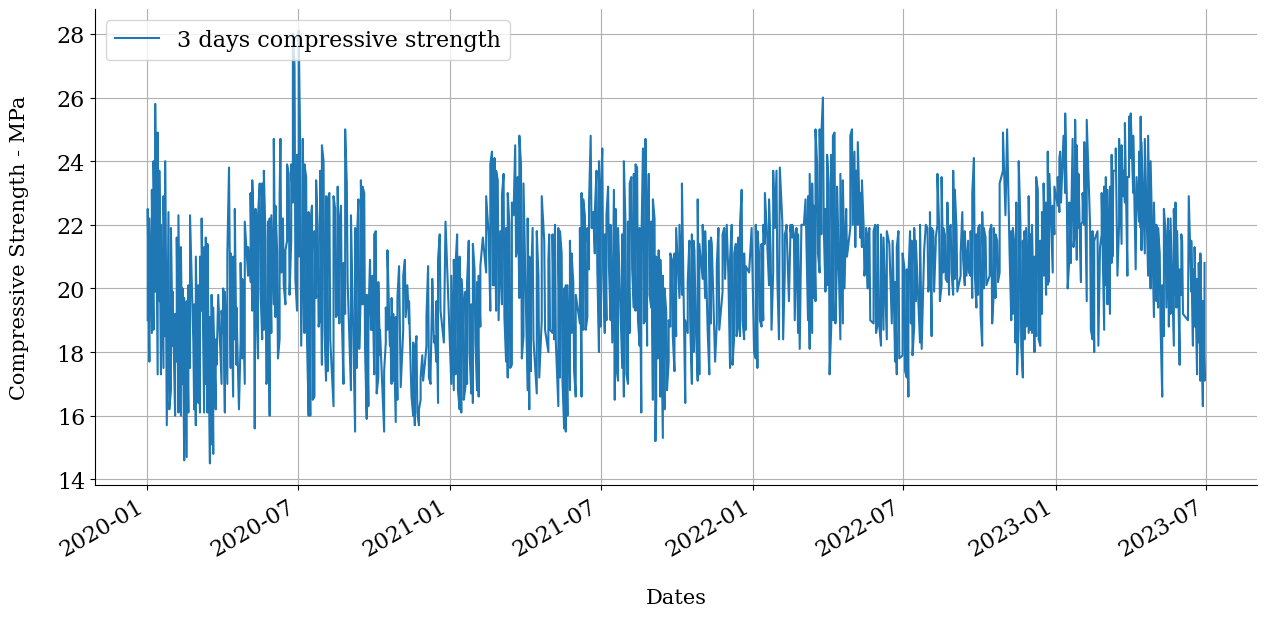

<IPython.core.display.Javascript object>

In [80]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

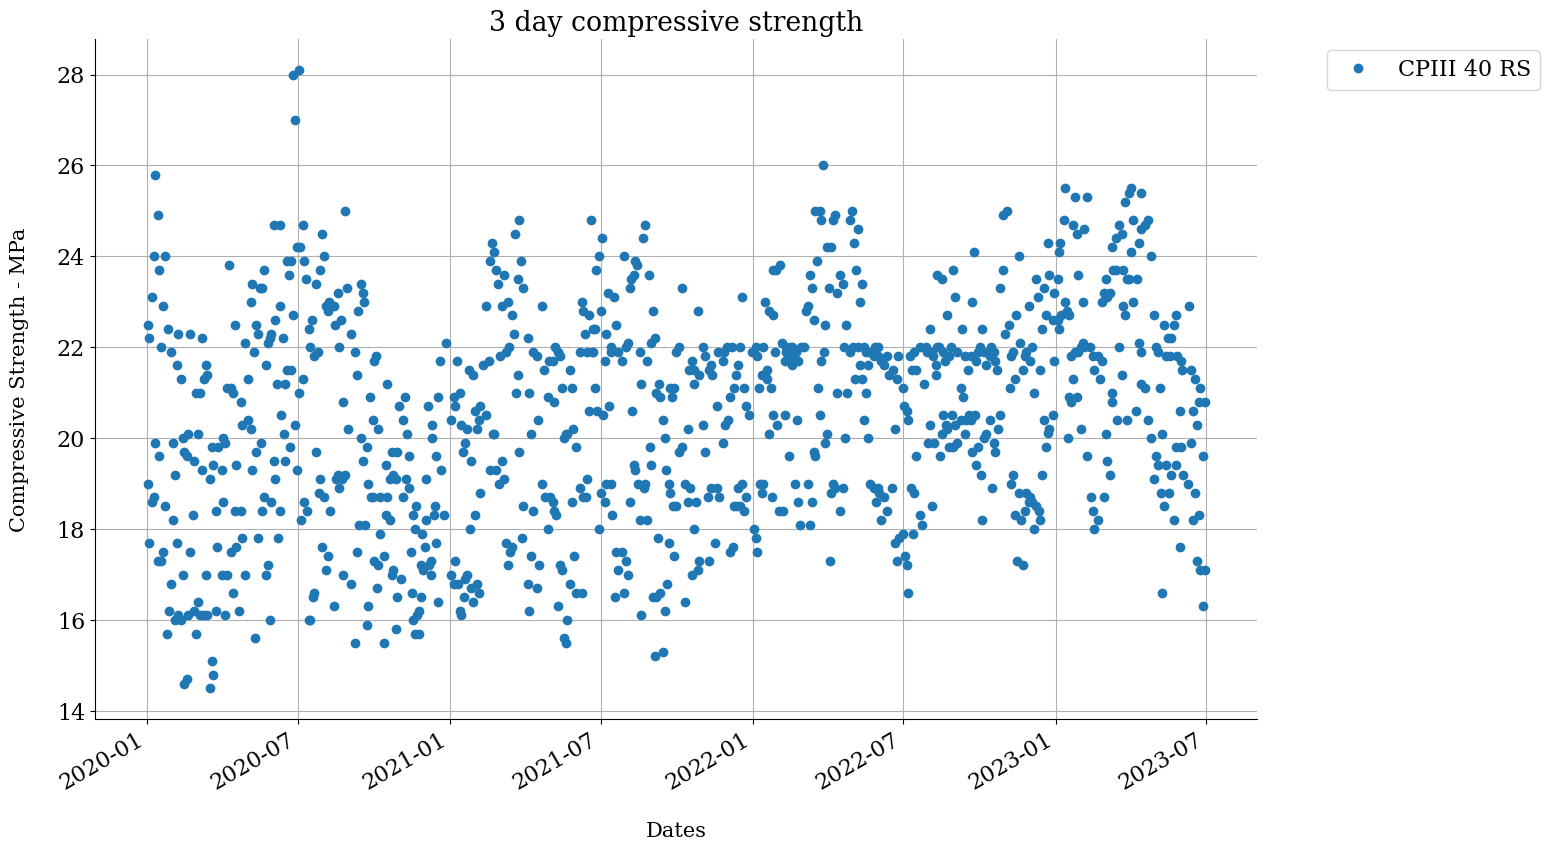

<IPython.core.display.Javascript object>

In [81]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

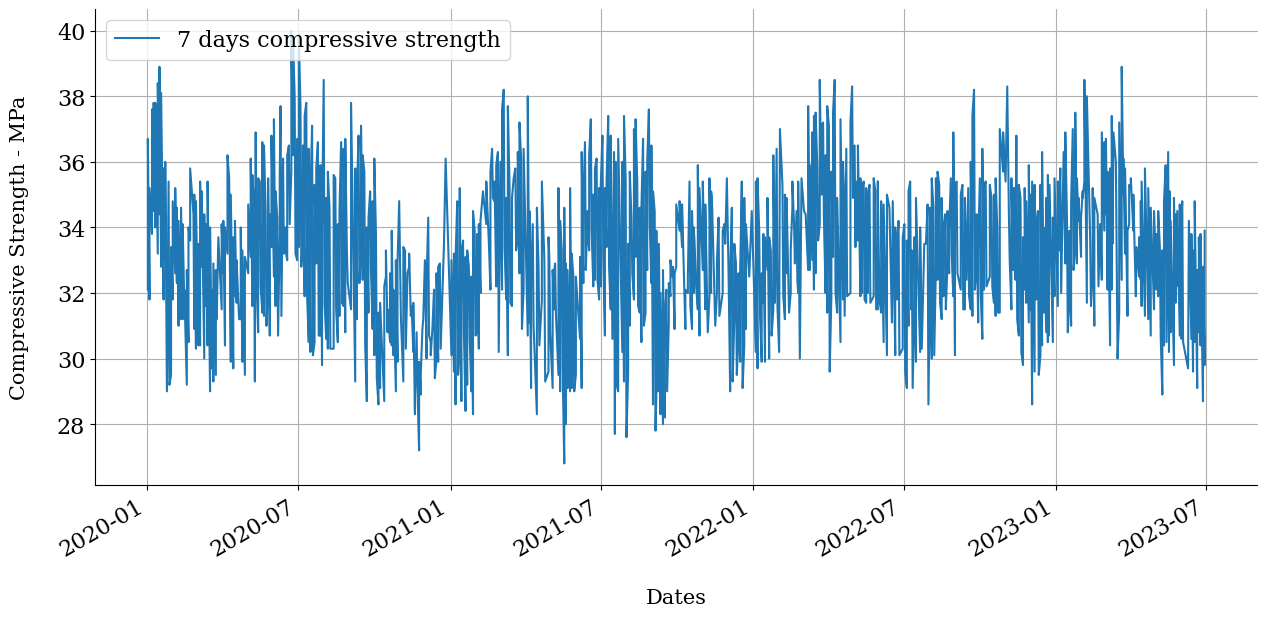

<IPython.core.display.Javascript object>

In [82]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["CS7"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

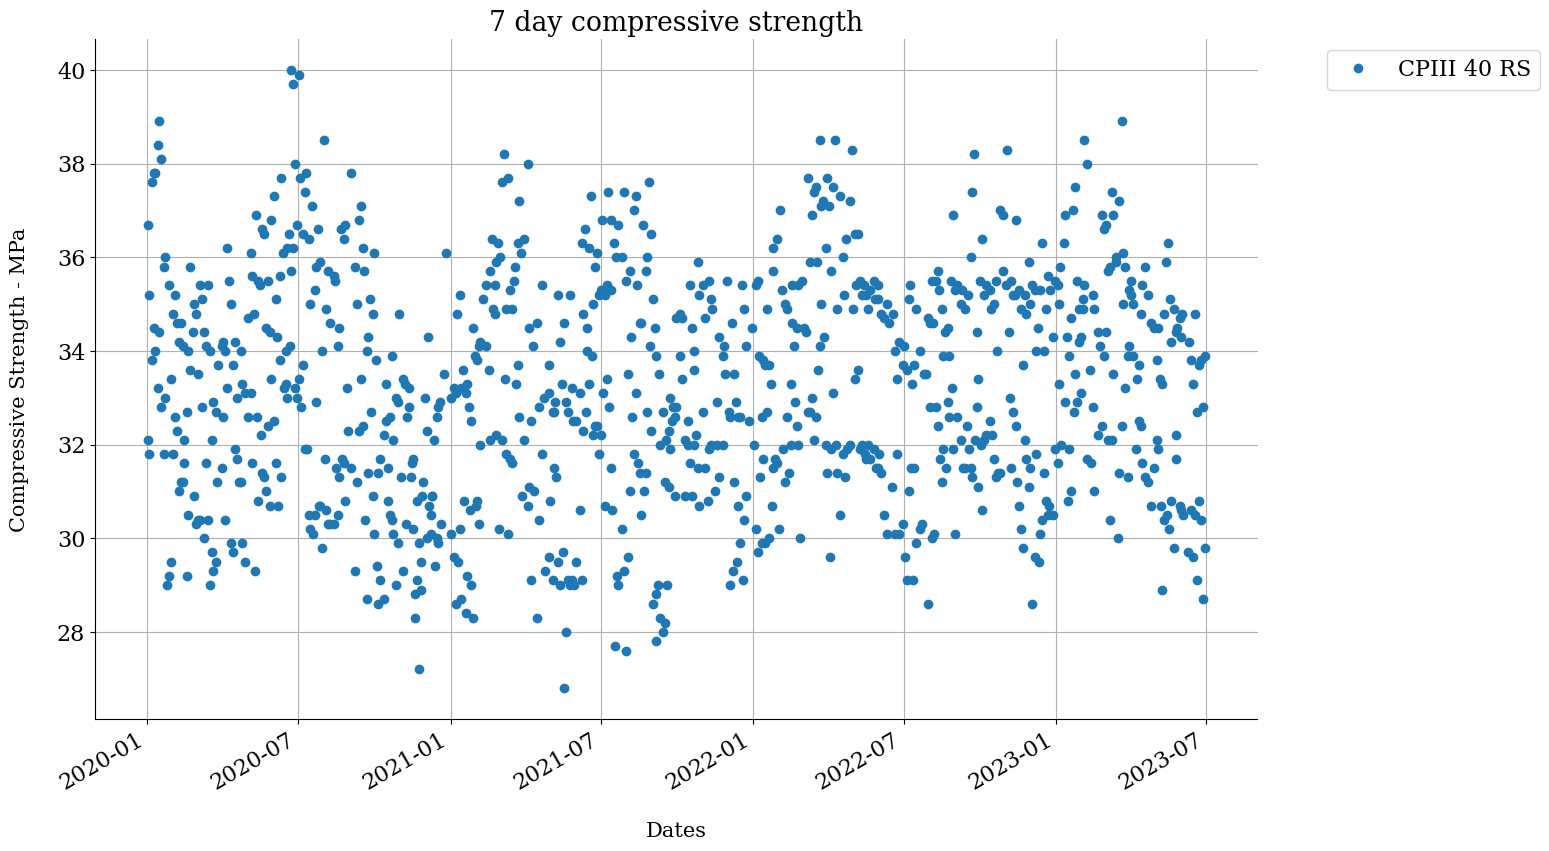

<IPython.core.display.Javascript object>

In [83]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()

#### 28 Days

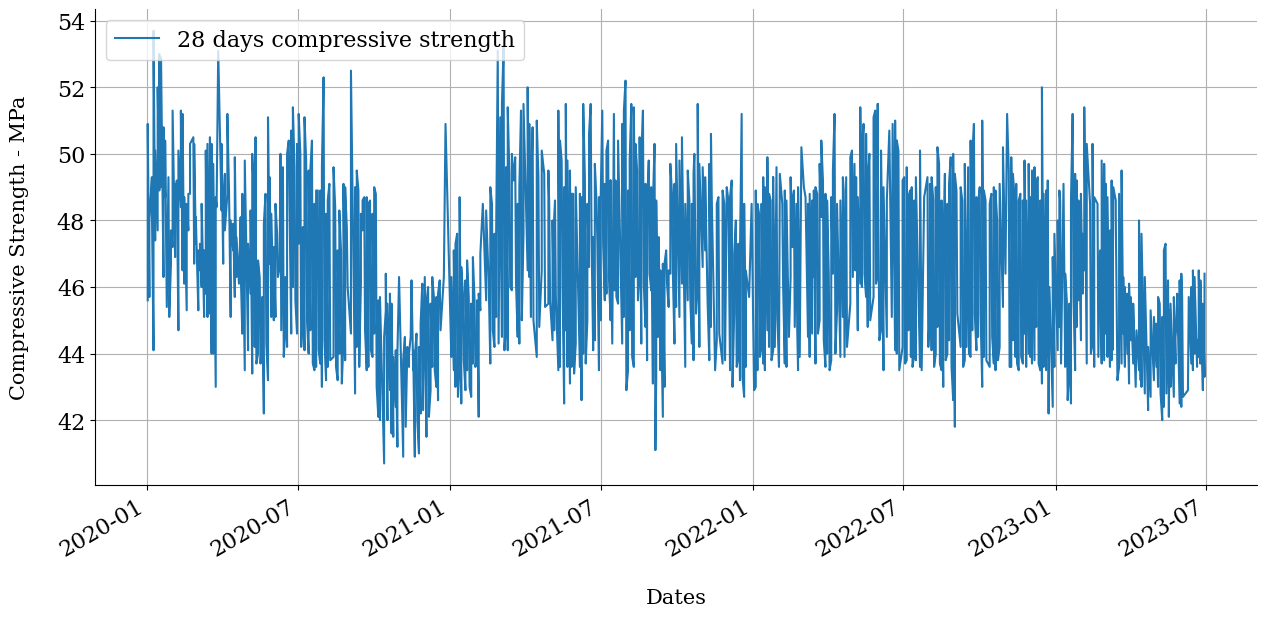

<IPython.core.display.Javascript object>

In [84]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

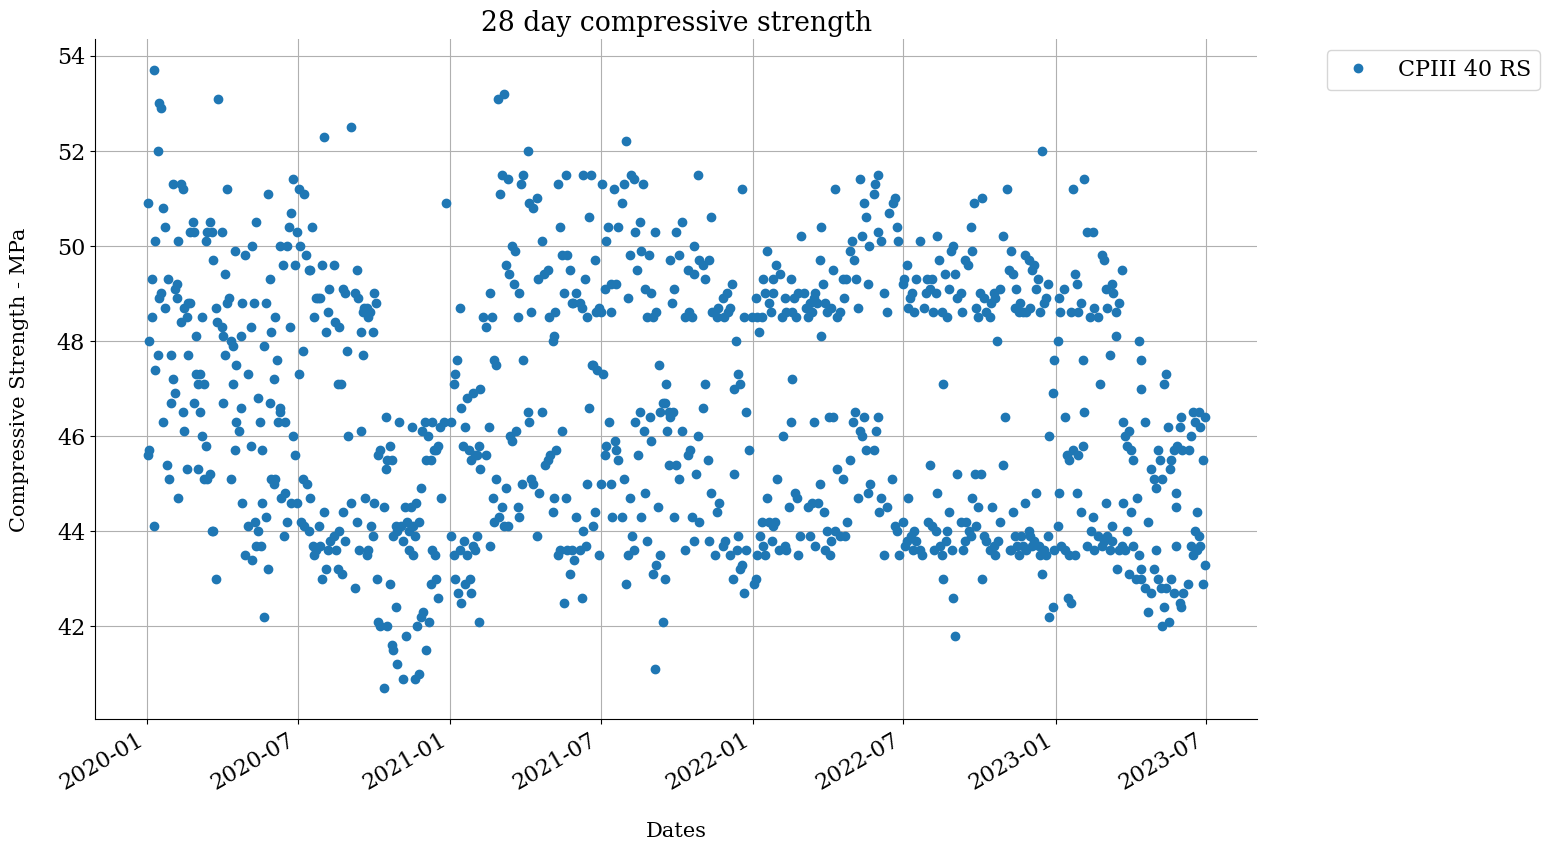

<IPython.core.display.Javascript object>

In [85]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()